## 任务 1

In [1]:
from typing import List, Tuple
import numpy as np
from sklearn.model_selection import train_test_split

def process_lfw_data(
    lfw_data, test_size: float = 0.3, random_state: int = 42
) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray, Tuple[int, int, int, List[str]]]:
    # 提取特征和目标
    X = lfw_data.data   # 对特征进行重标度
    y = lfw_data.target

    # 分割数据集
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, shuffle=True
    )

    # 提取图片的高度、宽度
    H, W = lfw_data.images.shape[1], lfw_data.images.shape[2]
    
    # 提取类别数和目标名
    n_classes = len(lfw_data.target_names)
    target_names = list(lfw_data.target_names)

    return X_train, X_test, y_train, y_test, (H, W, n_classes, target_names)

In [2]:
from sklearn.datasets import fetch_lfw_people
lfw_data = fetch_lfw_people(min_faces_per_person=100, resize=0.4)
X_train, X_test, y_true_train, y_true_test, (H, W, n_classes, target_names) = process_lfw_data(lfw_data)
H, W, n_classes, target_names

(50, 37, 2, ['George W Bush', 'Gerhard Schroeder'])

画出人脸图片的示例, 并输出数据集的描述性参数.

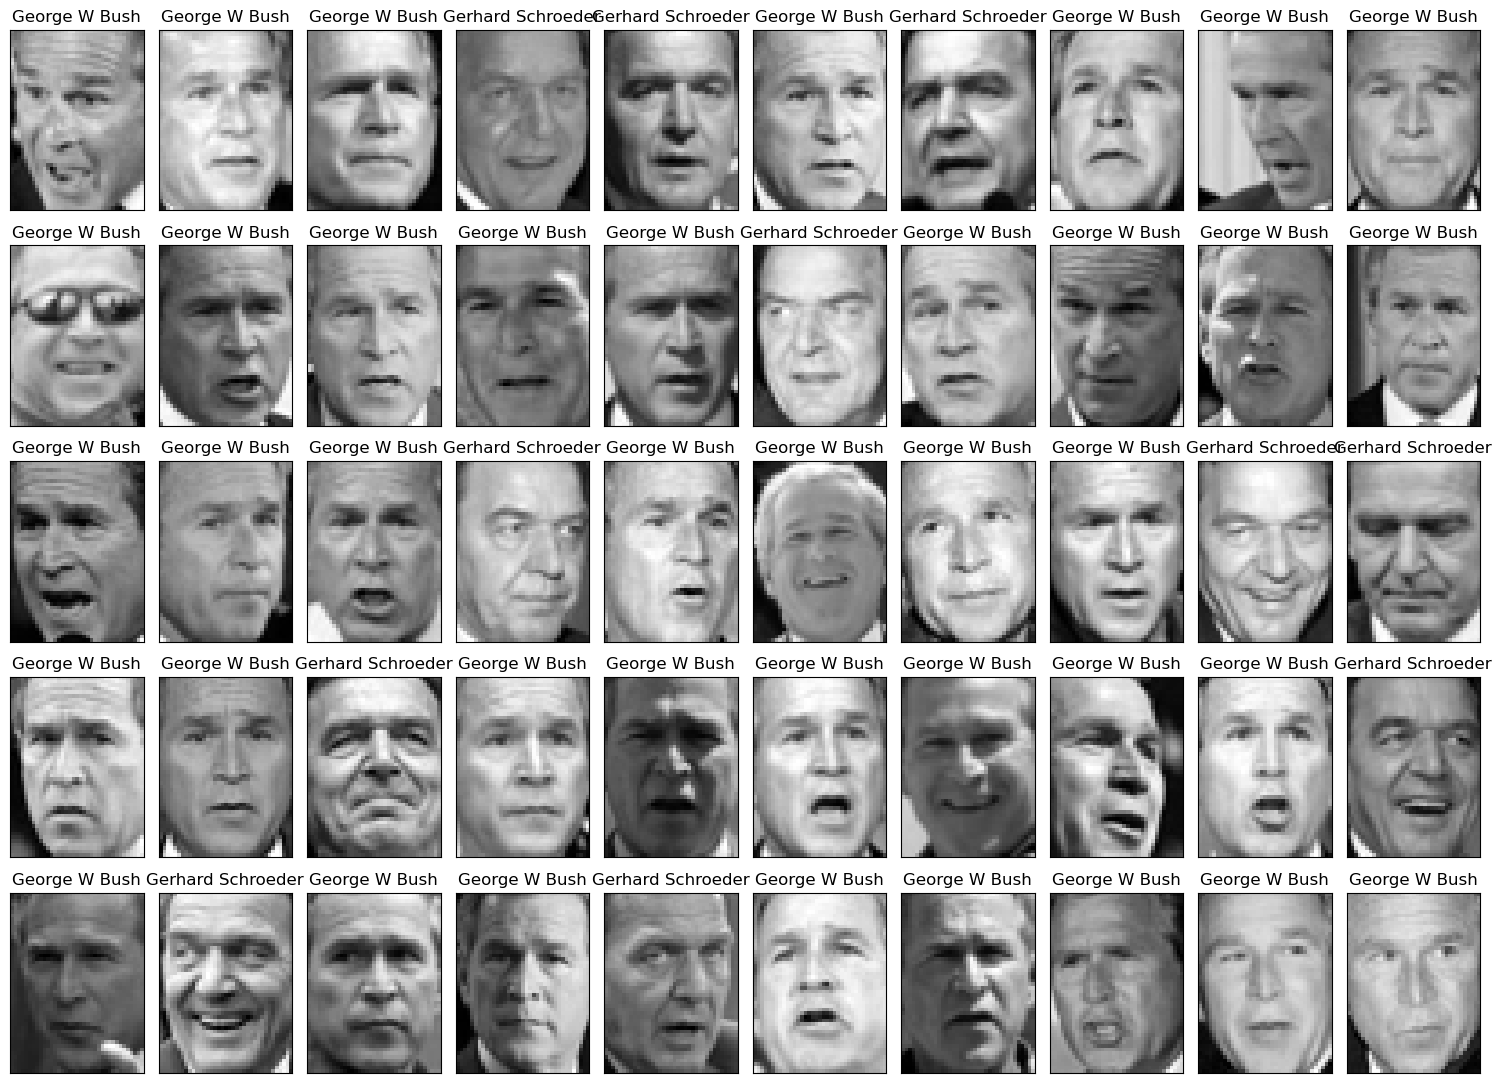

In [3]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import numpy as np

def visualize_lfw_faces(min_faces_per_person=100, resize=0.4, samples_per_row=10, n_samples_to_display=50):
    try:
        # 加载LFW人脸数据集
        lfw_people = fetch_lfw_people(min_faces_per_person=min_faces_per_person, resize=resize)
        images = lfw_people.images
        target_names = lfw_people.target_names
        targets = lfw_people.target

        # 选择要显示的样本
        indices = np.random.choice(range(len(images)), n_samples_to_display, replace=False)
        selected_images = images[indices]
        selected_labels = [target_names[target] for target in targets[indices]]

        # 显示选定的样本及其标签
        n_rows = (n_samples_to_display + samples_per_row - 1) // samples_per_row
        plt.figure(figsize=(15, 2.2 * n_rows))
        for i, (image, label) in enumerate(zip(selected_images, selected_labels)):
            plt.subplot(n_rows, samples_per_row, i + 1)
            plt.imshow(image, cmap=plt.cm.gray)
            plt.title(label, size=12)
            plt.xticks(())
            plt.yticks(())
        plt.tight_layout()
        plt.show() 

    except Exception as e:
        print(f"An error occurred: {e}")

# 调用函数来显示人脸图像和标签
visualize_lfw_faces()


## 任务 2

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [5]:
scores_vs_C = []
for C in (0.1, 1, 10):
    clf = SVC(C=C)
    scores_vs_C.append(cross_val_score(clf, X_train, y_true_train, n_jobs=-1).mean())
scores_vs_C

[0.8165792759051186, 0.9060674157303371, 0.9485393258426967]

### 2.1 答题

当`C`值变化时，模型的交叉验证得分也相应变化。这些得分可以帮助我们理解`C`值对SVM模型的影响：

1. **当`C`较小（如0.1）**：模型的交叉验证得分为0.8166，这表明模型可能太简单，无法充分捕捉数据的复杂性，导致欠拟合。较小的`C`值会使得模型尝试最大化间隔，即使这意味着一些训练样本会被错误分类。

2. **当`C`适中（如1）**：模型的交叉验证得分增加到0.9061，显示出比较小的`C`值更好的性能。这表明适中的`C`值提供了较好的平衡，使模型能够正确地泛化到未见过的数据。

3. **当`C`较大（如10）**：模型的交叉验证得分进一步增加到0.9485，这可能表明模型现在变得更加复杂，能够捕捉更多的数据特征。然而，这也增加了过拟合的风险，即模型可能太过专注于训练数据的特定特征，而不够泛化。

综上所述，`C`值在SVM中用于控制模型的复杂度和泛化能力。选择合适的`C`值对于达到良好的模型性能至关重要。较小的`C`值倾向于更简单的模型（可能欠拟合），而较大的`C`值则倾向于更复杂的模型（可能过拟合）。因此，通过调整`C`值，我们可以在模型复杂度和泛化能力之间找到合适的平衡点。

In [6]:
scores_vs_gamma = []
for gamma in (0.001, 0.01, 0.1):
    clf = SVC(gamma=gamma)
    scores_vs_gamma.append(cross_val_score(clf, X_train, y_true_train, n_jobs=-1).mean())
scores_vs_gamma

[0.8165792759051186, 0.8769288389513108, 0.8165792759051186]

### 2.2 答题

`gamma`值在支持向量机（SVM）使用径向基函数（RBF）核时起着关键作用。它控制着单个训练样本对于决策边界的影响范围。具体来说，`gamma`值决定了RBF核的宽度。`gamma`值较大意味着训练样本的影响范围更小，即形成较紧密的决策边界；而`gamma`值较小则意味着影响范围更广，决策边界更平滑。

从您提供的结果中可以看出：

1. **当`gamma`较小（如0.001）**：模型的交叉验证得分为0.8166，这可能表明模型未能捕捉到数据的复杂性，导致欠拟合。较小的`gamma`值导致更宽松的决策边界，这可能无法捕捉训练数据中的所有模式。

2. **当`gamma`适中（如0.01）**：模型的交叉验证得分为0.8769，这表明模型具有更好的性能。适中的`gamma`值可能为数据提供了恰当的复杂度和灵活性。

3. **当`gamma`较大（如0.1）**：模型的交叉验证得分再次降到0.8166，这可能意味着模型开始过拟合。较大的`gamma`值导致每个训练样本对决策边界的影响较大，可能使得模型过于专注于训练数据的特定特点，从而失去了泛化能力。

综上所述，`gamma`值在使用RBF核的SVM中影响着模型的泛化能力和对训练数据的敏感度。选择合适的`gamma`值可以帮助找到模型复杂度和泛化能力之间的平衡点，从而优化模型的性能。

## 任务 3

In [7]:
from typing import Dict
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

def get_cv_data(
    C_space: np.array, gamma_space: np.array, X_train: np.array, y_true_train: np.array
) -> Tuple[Tuple[np.array, np.array, np.array], Dict]:
    
    model = SVC()
    param_grid = {'C': C_space, 'gamma': gamma_space}
    grid_search = GridSearchCV(model, param_grid, n_jobs=-1)

    grid_search.fit(X_train, y_true_train)

    results = grid_search.cv_results_
    scores = results['mean_test_score']
    C, gamma = np.meshgrid(C_space, gamma_space, indexing='ij')
    scores = scores.reshape(C.shape)

    return (C, gamma, scores), grid_search.best_params_

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

def get_cv_data(
    C_space: np.array, gamma_space: np.array, X_train: np.array, y_true_train: np.array, is_print = False
) -> Tuple[Tuple[np.array, np.array, np.array], Dict]:
    
    model = SVC()
    param_grid = {'C': C_space, 'gamma': gamma_space}
    grid_search = GridSearchCV(model, param_grid, n_jobs=-1, verbose=2)

    grid_search.fit(X_train, y_true_train)

    results = grid_search.cv_results_
    means = results['mean_test_score']
    stds = results['std_test_score']
    
    if is_print:
        print("Grid scores on development set:")
        print()
        for mean, std, params in zip(means, stds, results["params"]):
            print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
        print()
        
    scores = results['mean_test_score']
    C, gamma = np.meshgrid(C_space, gamma_space, indexing='ij')
    scores = scores.reshape(C.shape)

    return (C, gamma, scores), grid_search.best_params_

# 你的代码中其余部分保持不变


In [9]:
C_space = np.logspace(-0.5, 1.5, 10)
gamma_space = np.logspace(-3, -1, 10)
(X, Y, Z), best_params = get_cv_data(C_space, gamma_space, X_train, y_true_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [10]:
(X, Y, Z), best_params

((array([[ 0.31622777,  0.31622777,  0.31622777,  0.31622777,  0.31622777,
           0.31622777,  0.31622777,  0.31622777,  0.31622777,  0.31622777],
         [ 0.52749971,  0.52749971,  0.52749971,  0.52749971,  0.52749971,
           0.52749971,  0.52749971,  0.52749971,  0.52749971,  0.52749971],
         [ 0.87992254,  0.87992254,  0.87992254,  0.87992254,  0.87992254,
           0.87992254,  0.87992254,  0.87992254,  0.87992254,  0.87992254],
         [ 1.46779927,  1.46779927,  1.46779927,  1.46779927,  1.46779927,
           1.46779927,  1.46779927,  1.46779927,  1.46779927,  1.46779927],
         [ 2.44843675,  2.44843675,  2.44843675,  2.44843675,  2.44843675,
           2.44843675,  2.44843675,  2.44843675,  2.44843675,  2.44843675],
         [ 4.08423865,  4.08423865,  4.08423865,  4.08423865,  4.08423865,
           4.08423865,  4.08423865,  4.08423865,  4.08423865,  4.08423865],
         [ 6.81292069,  6.81292069,  6.81292069,  6.81292069,  6.81292069,
           6.812920

In [11]:
best_params

{'C': 4.084238652674522, 'gamma': 0.007742636826811269}

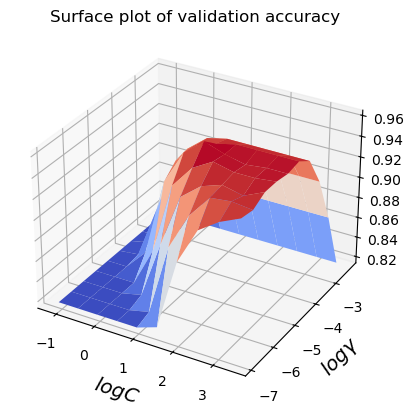

In [12]:
from matplotlib import pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(np.log(X), np.log(Y), Z, cmap="coolwarm")
ax.set_xlabel(r"$log{C}$", weight='bold', size='x-large')
ax.set_ylabel(r"$log{\gamma}$", weight='bold', size='x-large')
ax.set_title("Surface plot of validation accuracy")
plt.show()

## 任务 4

In [13]:
from sklearn.metrics import confusion_matrix

def train_and_eval(
    best_params, X_train: np.array, X_test: np.array, y_true_train: np.array, y_true_test: np.array
) -> Tuple[object, np.array, np.array]:

    clf = SVC(**best_params)
    clf.fit(X_train, y_true_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    cm_train = confusion_matrix(y_true_train, y_pred_train)
    cm_test = confusion_matrix(y_true_test, y_pred_test)

    return clf, cm_train, cm_test

In [14]:
clf, cm_train, cm_test = train_and_eval(
    best_params, X_train, X_test, y_true_train, y_true_test
)

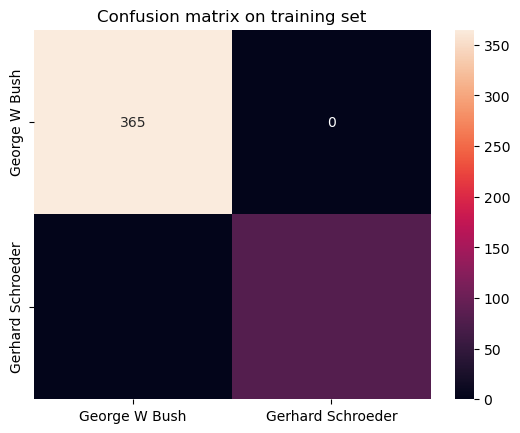

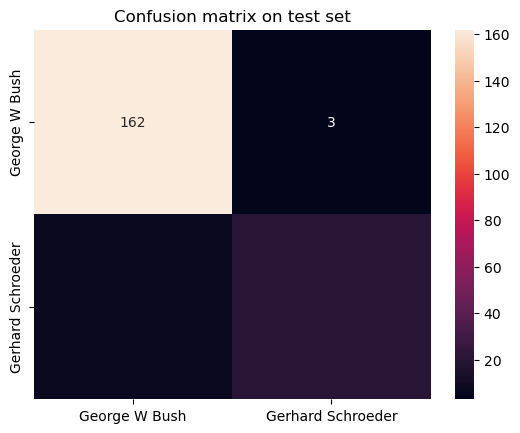

In [15]:
import pandas as pd
import seaborn as sns

cm_train = pd.DataFrame(cm_train, index=target_names, columns=target_names)
sns.heatmap(cm_train, annot=True, fmt=".0f")
plt.title("Confusion matrix on training set")
plt.show()

cm_test = pd.DataFrame(cm_test, index=target_names, columns=target_names)
sns.heatmap(cm_test, annot=True, fmt=".0f")
plt.title("Confusion matrix on test set")
plt.show()

## 任务 5

In [48]:
clf.support_.shape

(185,)

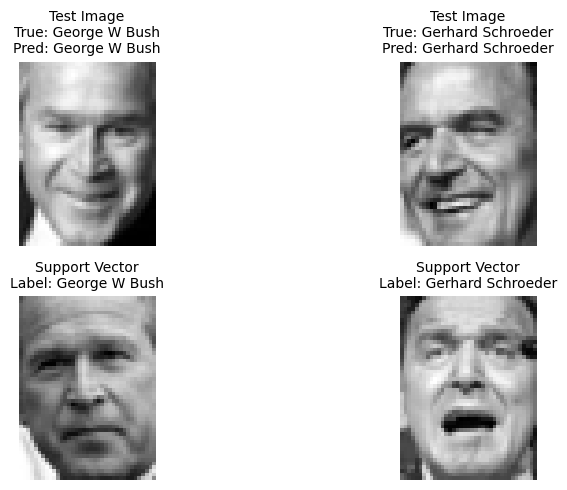

In [67]:
def visualize_support_vectors(clf, X_test, y_test, height, width, seed=None):
    if seed:
        np.random.seed(seed)
    support_vectors_indices = clf.support_
    support_vectors_labels = clf.predict(clf.support_vectors_)
    support_vectors = clf.support_vectors_
    support_dict = {index: vector for index, vector in zip(support_vectors_indices, support_vectors)}

    unique_labels = np.unique(y_test)

    plt.figure(figsize=(10, 5))
    for i, label in enumerate(unique_labels):
        # 从支持向量中随机选择一个该类的向量
        sv_indices = support_vectors_indices[support_vectors_labels == label]
        chosen_sv_index = np.random.choice(sv_indices)

        # 绘制测试集中的图像
        test_indices = np.where(y_test == label)[0]
        chosen_test_index = np.random.choice(test_indices)
        chosen_test_image = X_test[chosen_test_index].reshape(height, width)
        true_name = target_names[label]
        pred_name = target_names[clf.predict([X_test[chosen_test_index]])[0]]

        # 绘制支持向量的图像

        chosen_sv_image = support_dict[chosen_sv_index].reshape(height, width)

        # 绘制测试图片
        plt.subplot(2, len(unique_labels), i + 1)
        plt.imshow(chosen_test_image, cmap=plt.cm.gray)
        plt.title(f"Test Image\nTrue: {true_name}\nPred: {pred_name}", size=10)
        plt.axis('off')

        # 绘制支持向量图片
        plt.subplot(2, len(unique_labels), i + len(unique_labels) + 1)
        plt.imshow(chosen_sv_image, cmap=plt.cm.gray)
        plt.title(f"Support Vector\nLabel: {true_name}", size=10)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

visualize_support_vectors(clf, X_test, y_true_test, H, W)

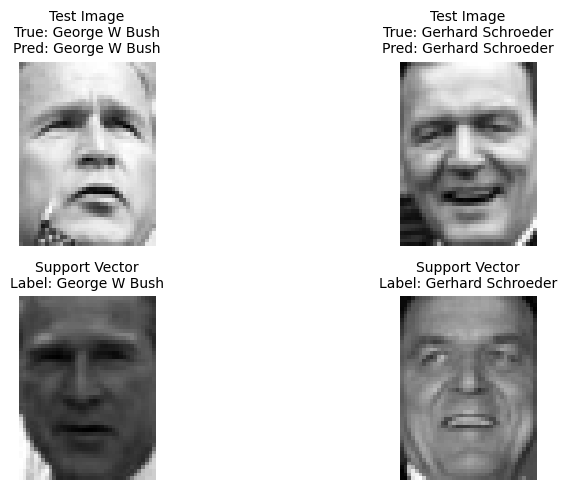

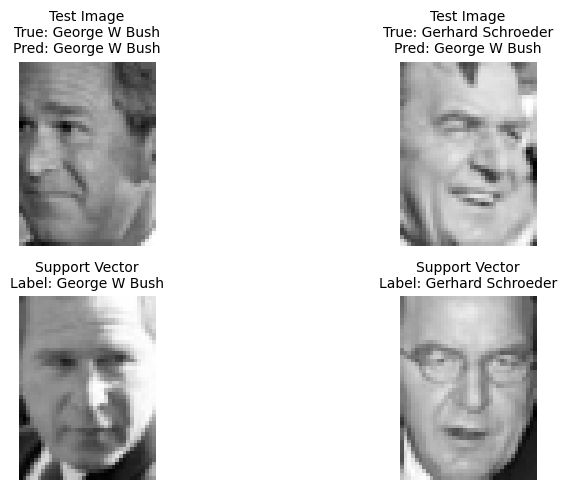

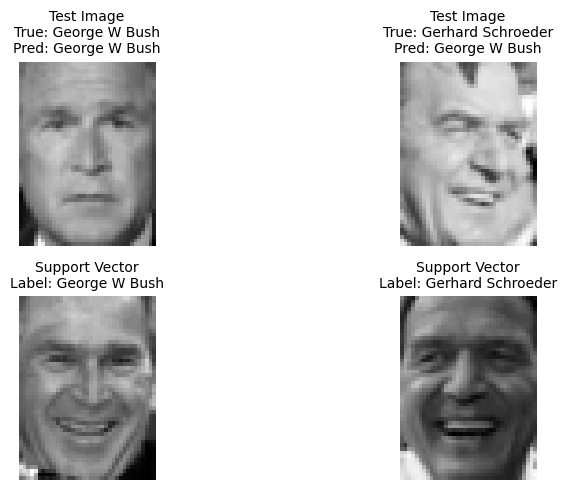

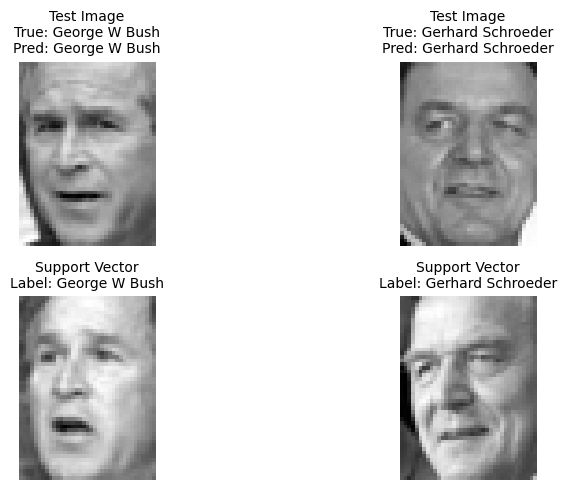

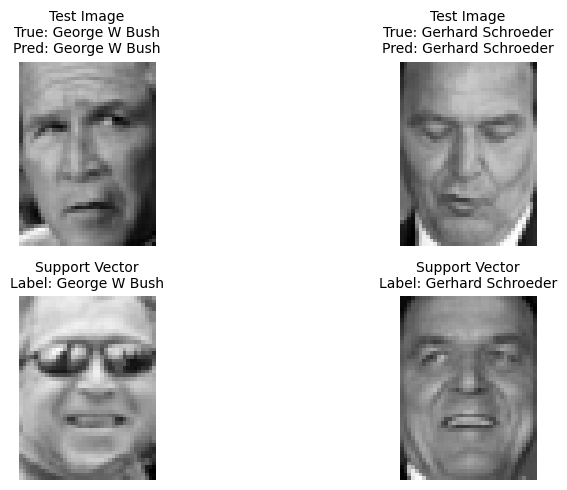

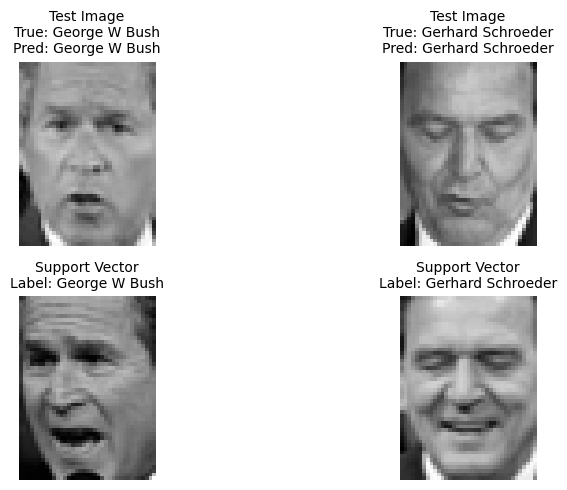

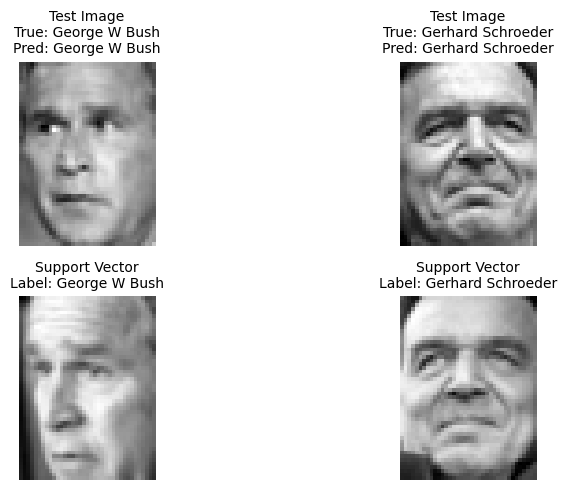

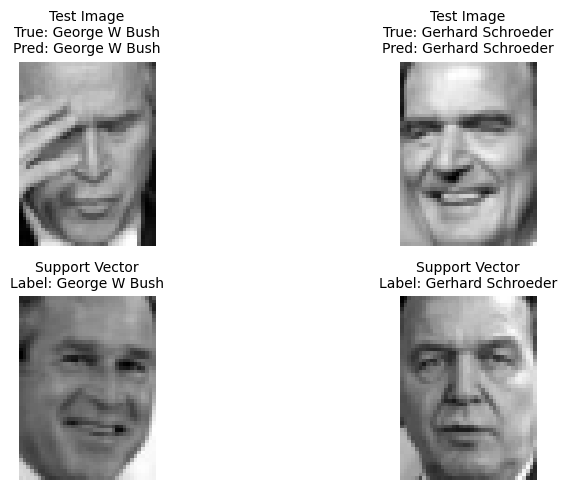

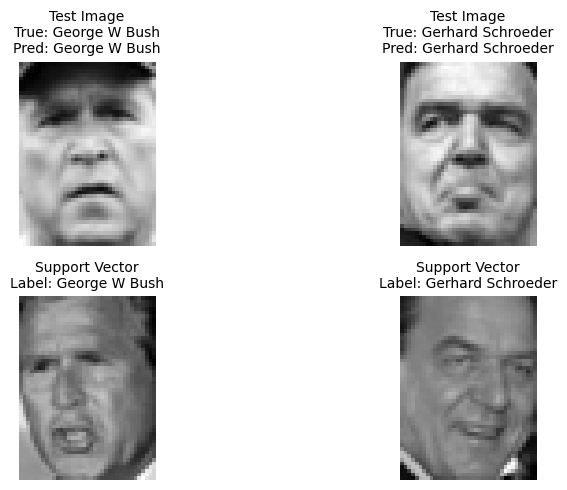

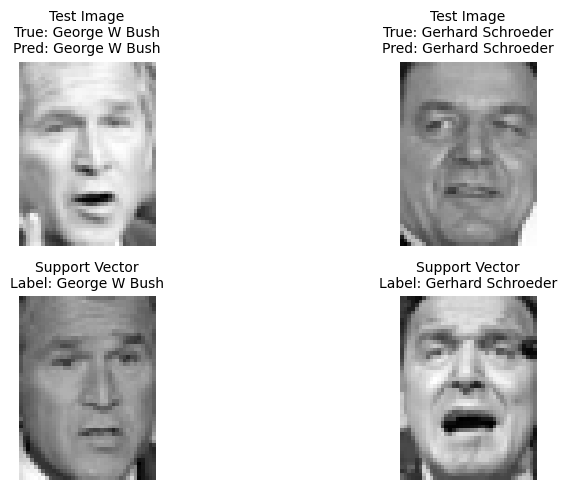

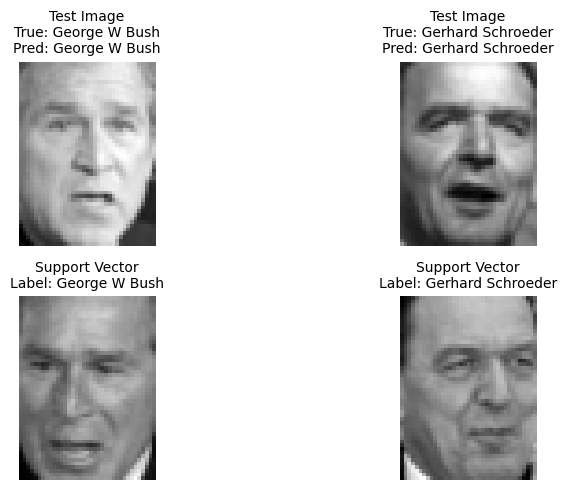

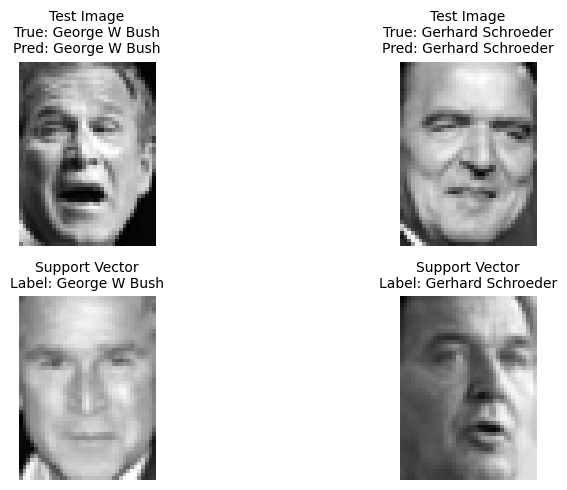

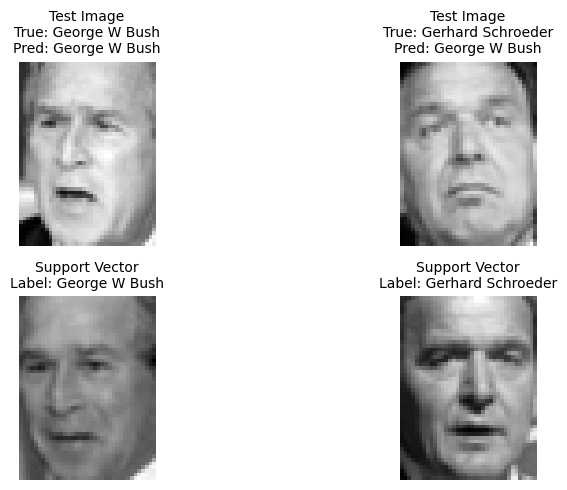

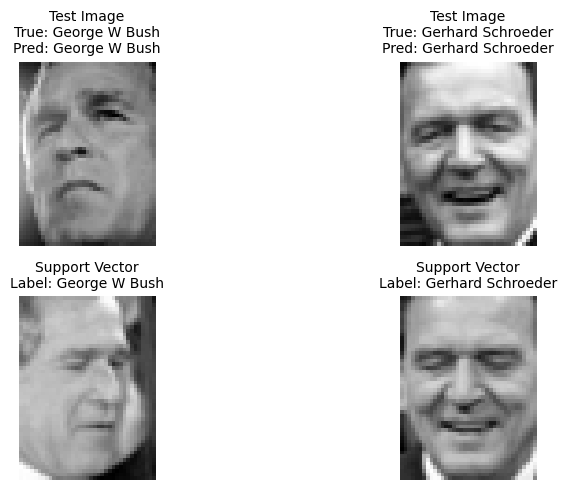

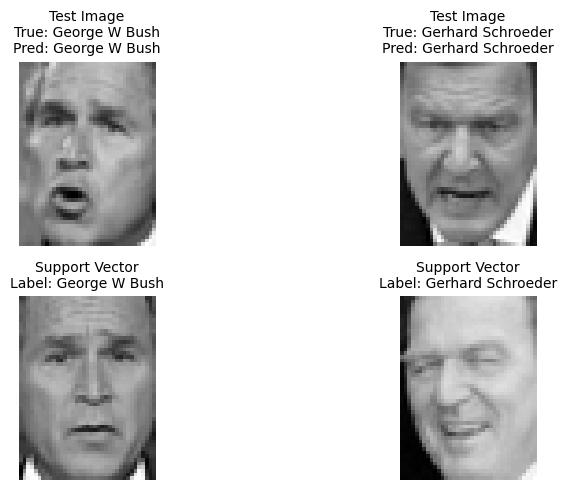

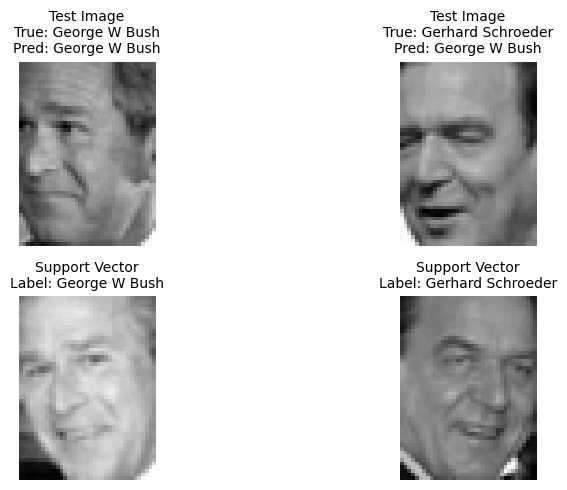

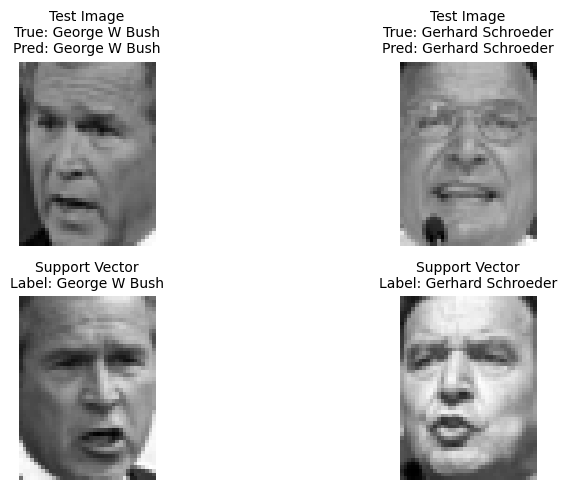

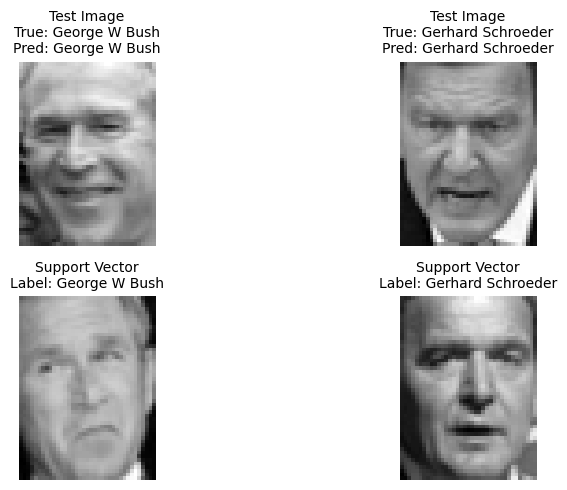

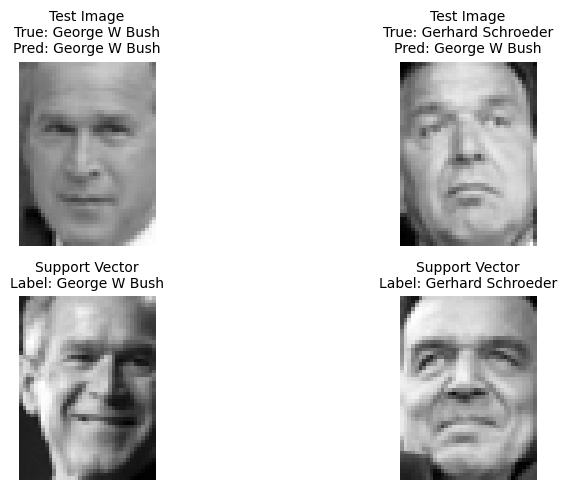

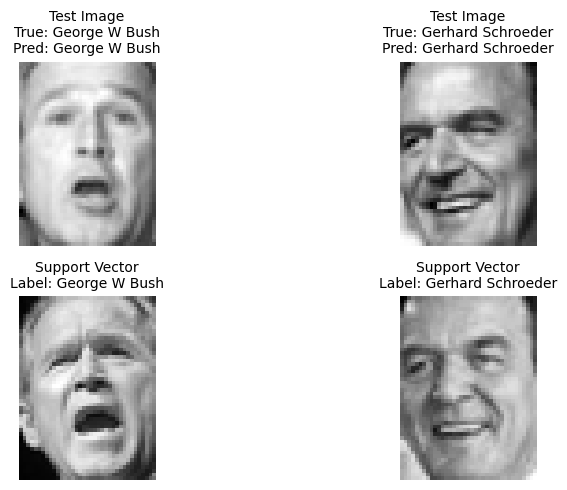

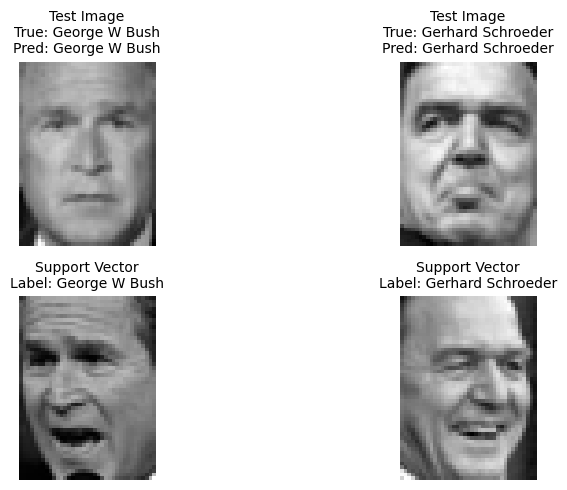

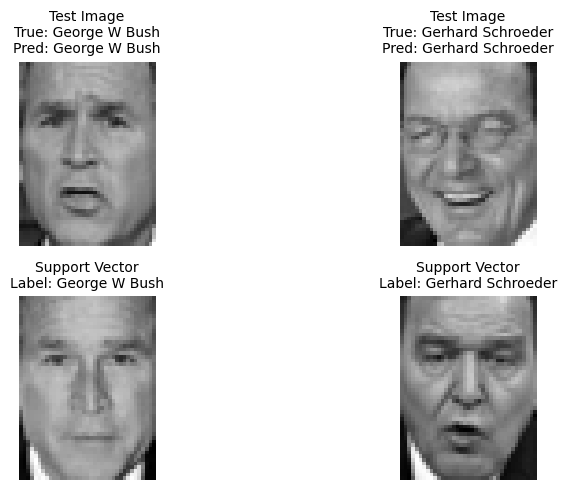

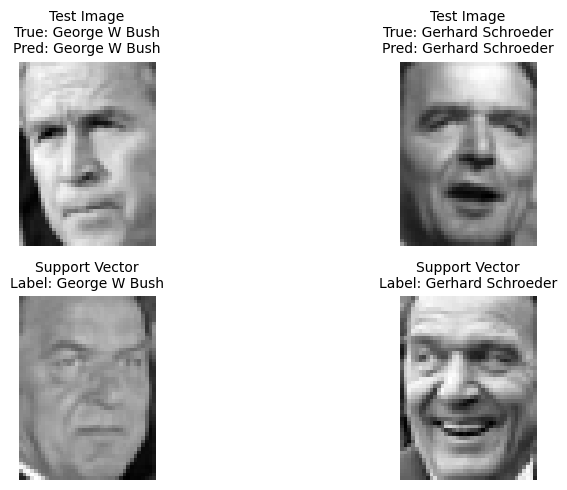

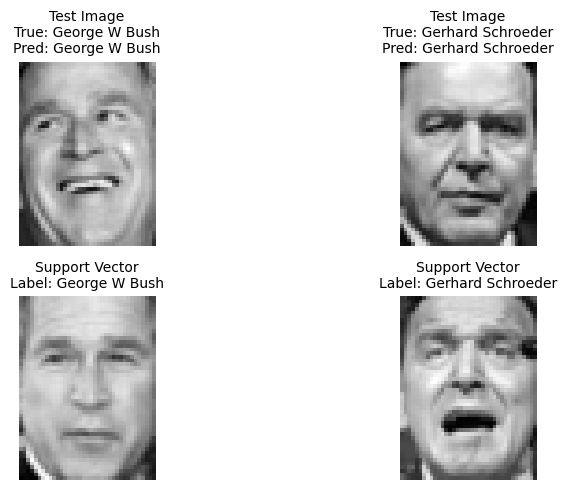

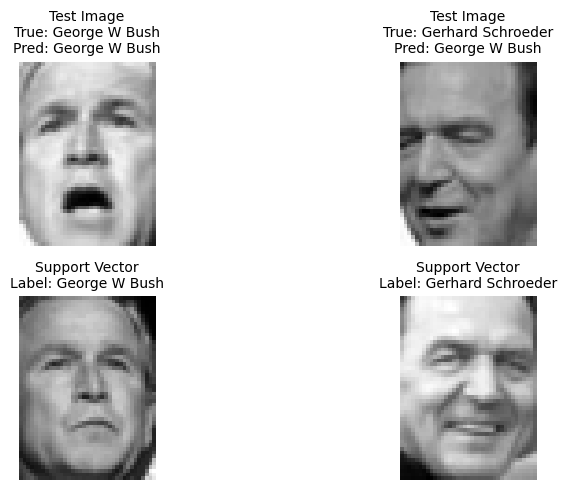

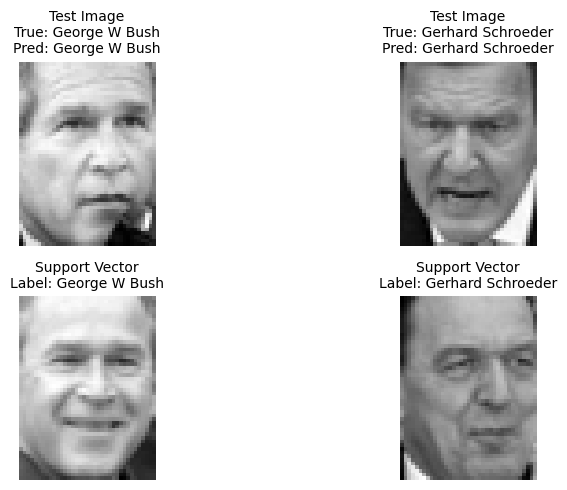

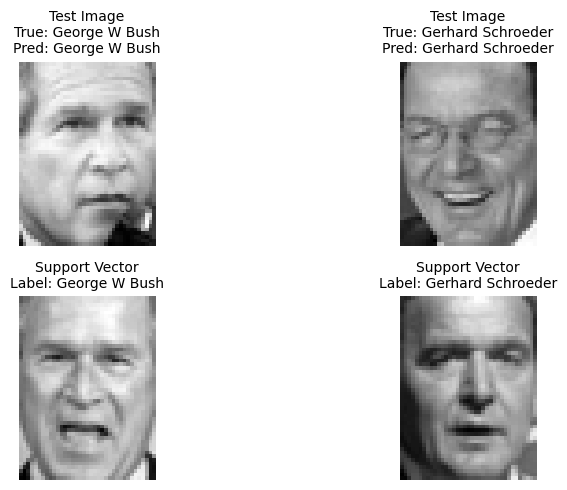

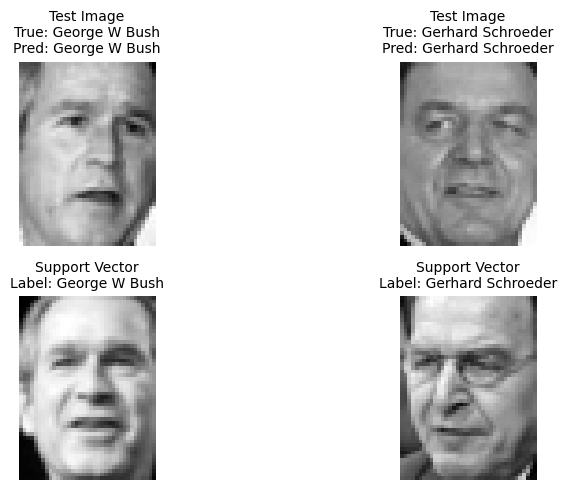

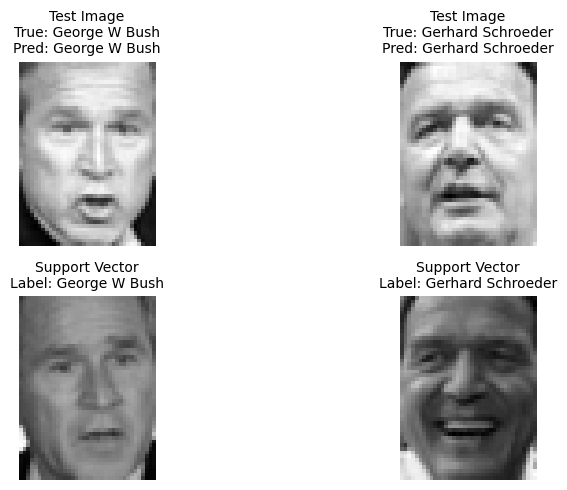

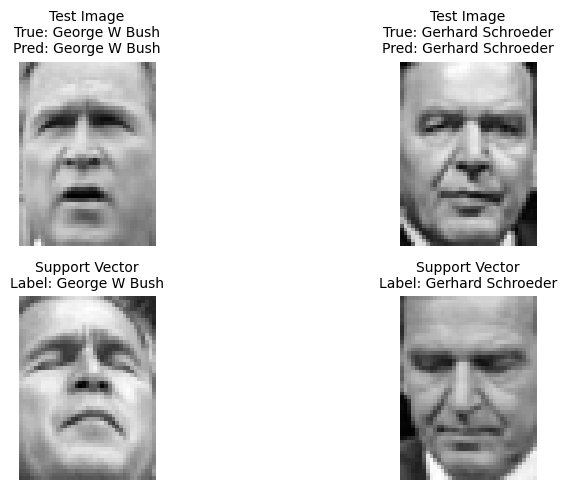

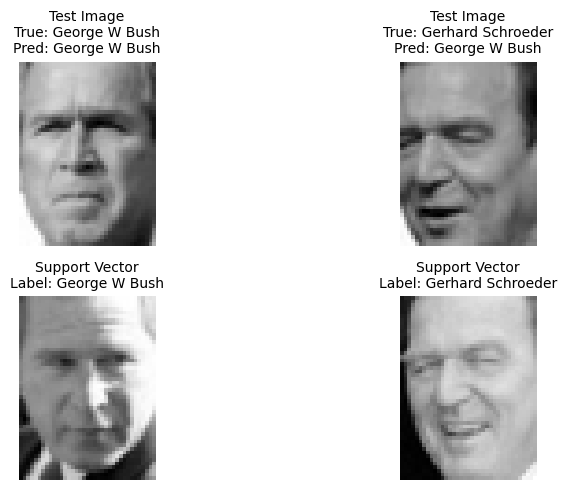

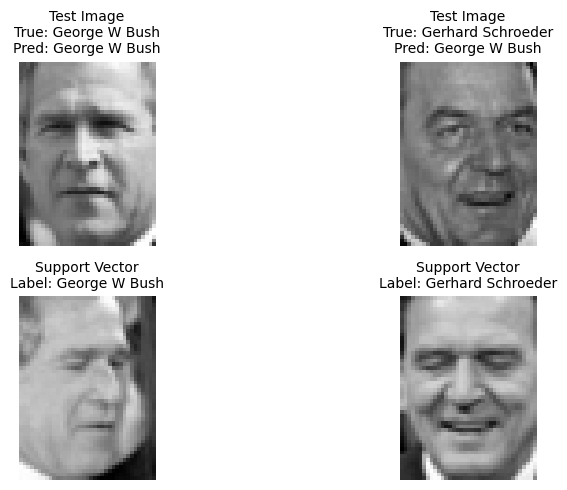

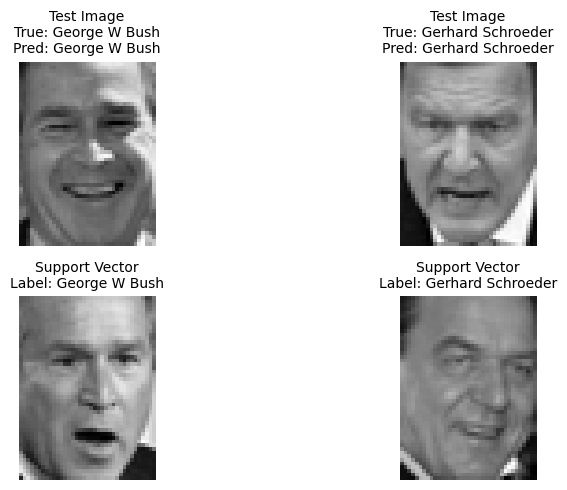

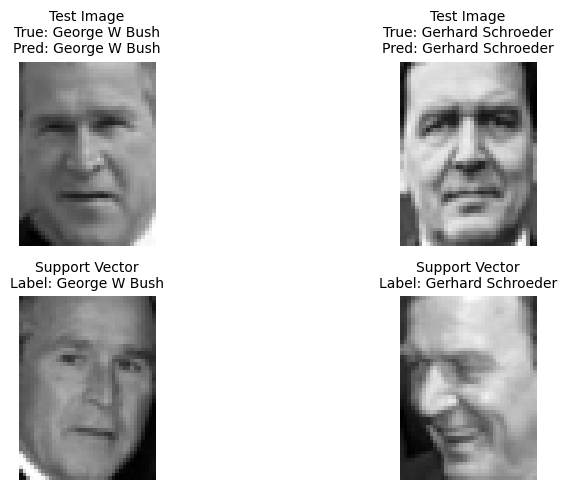

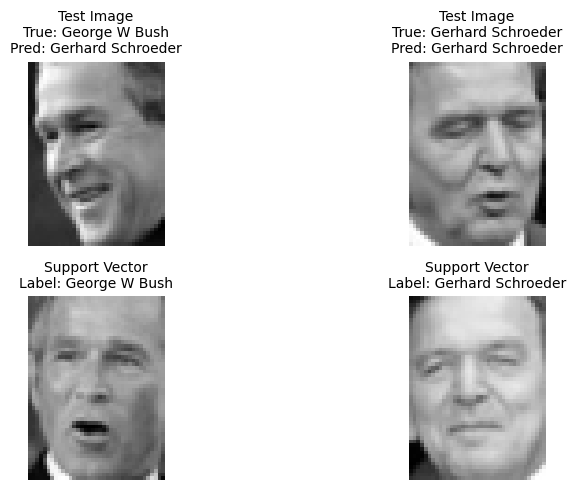

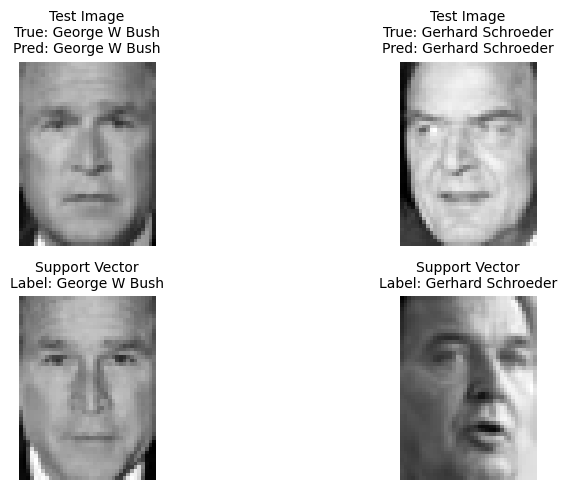

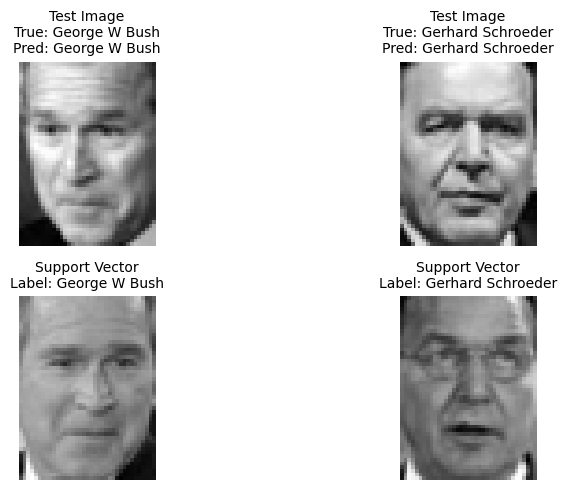

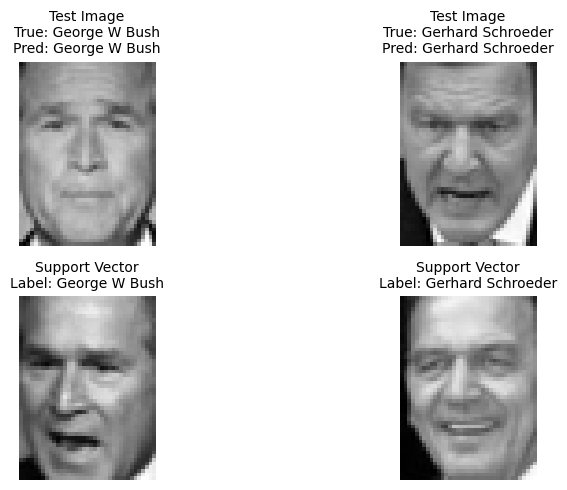

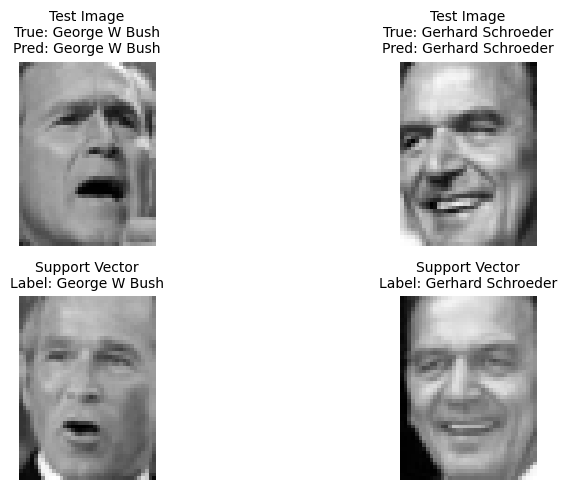

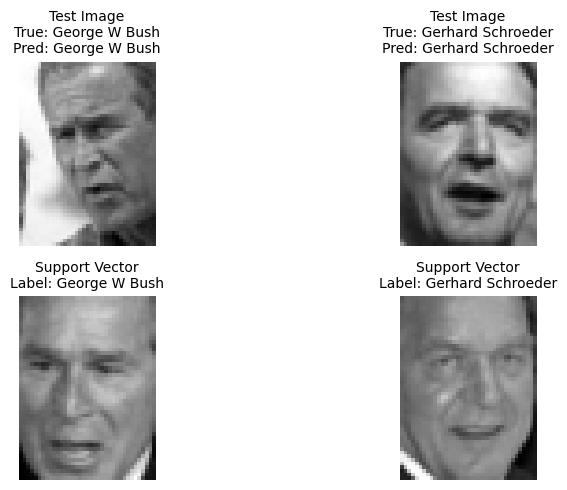

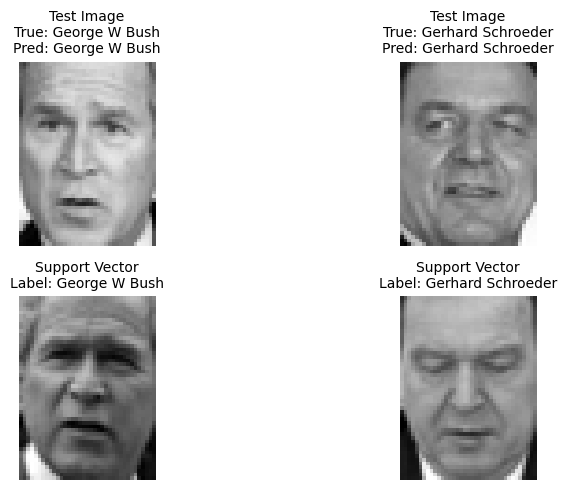

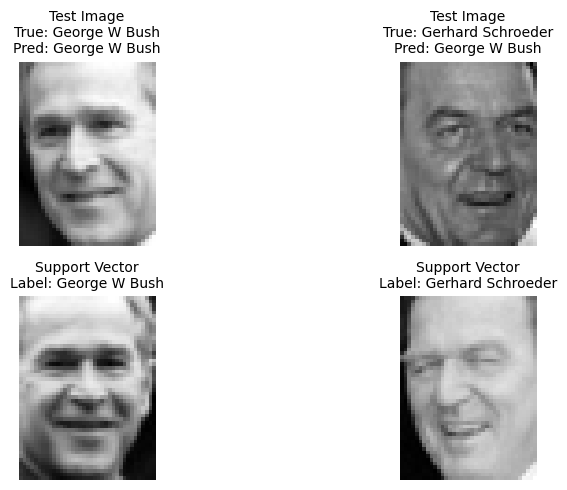

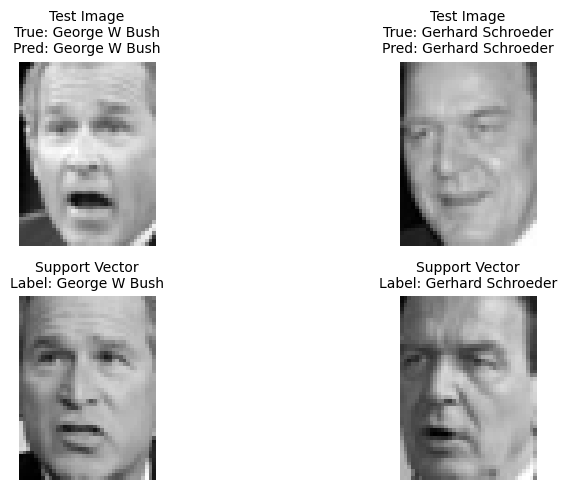

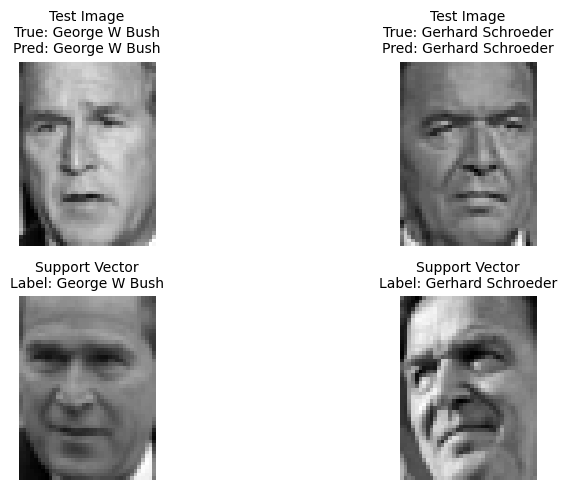

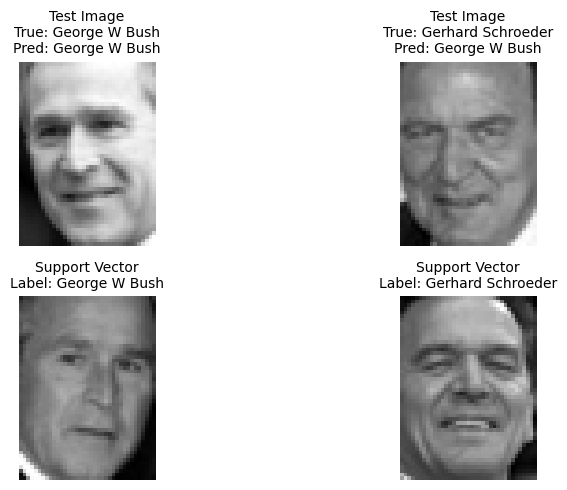

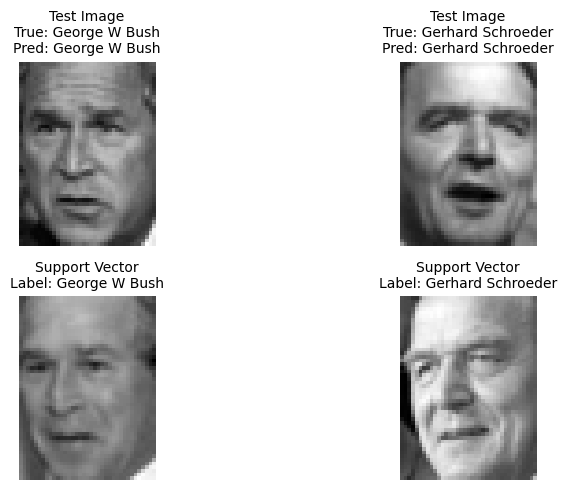

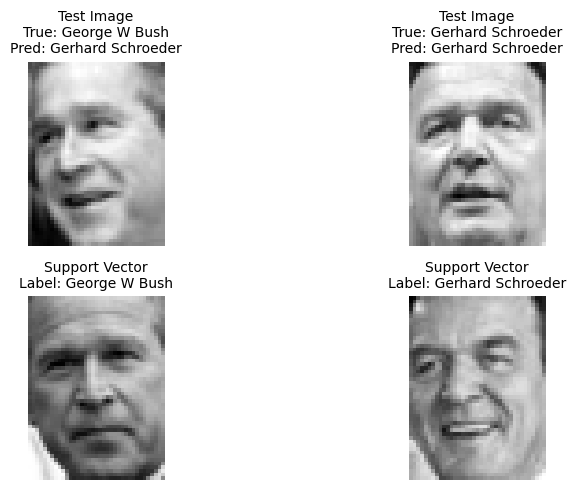

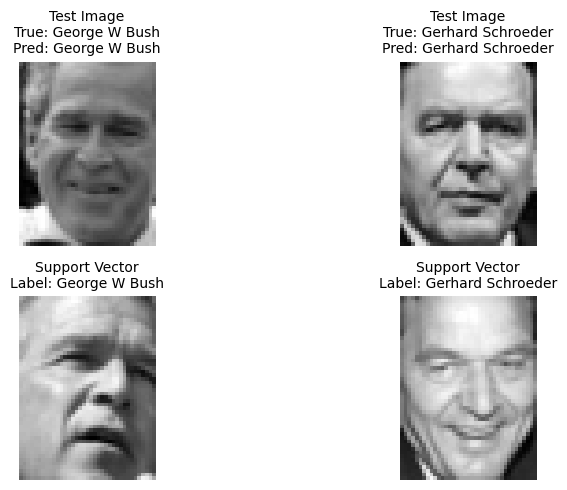

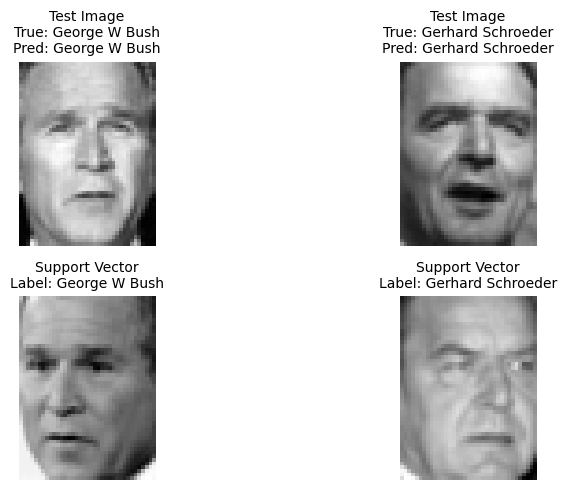

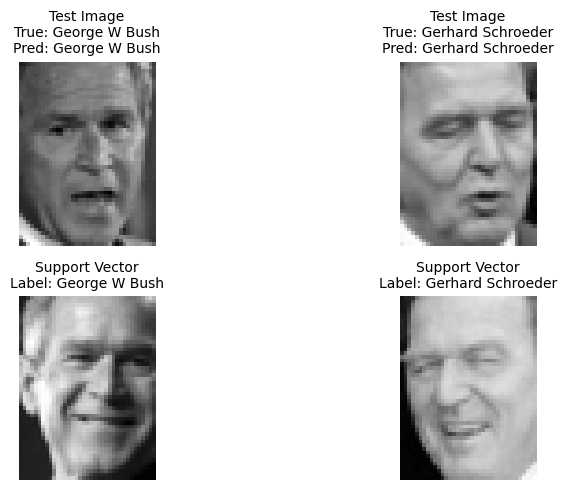

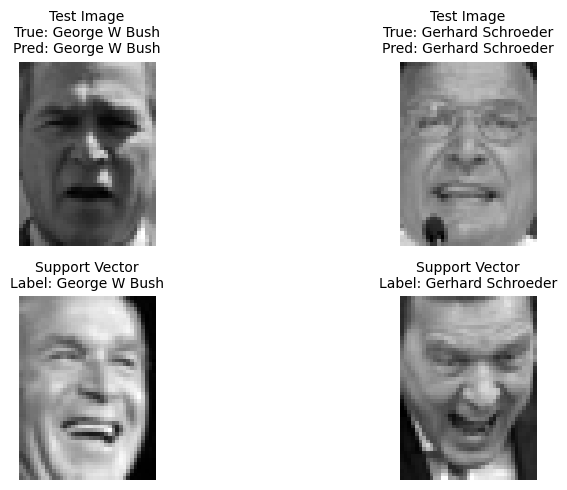

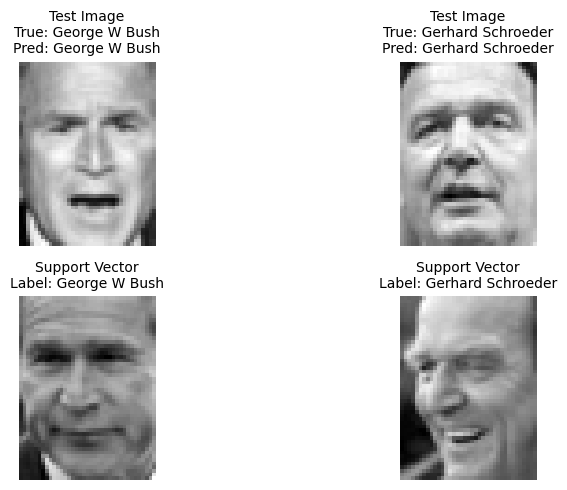

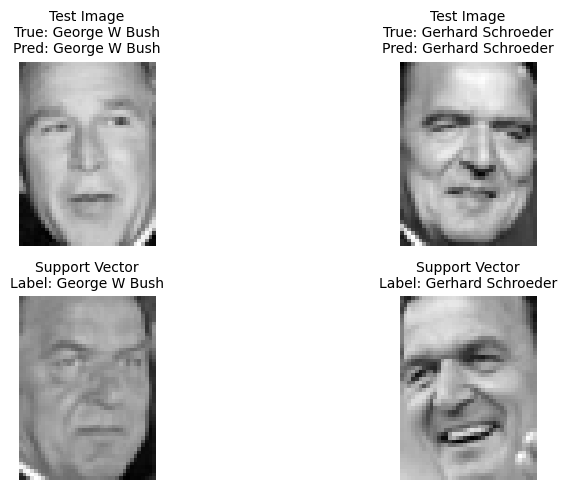

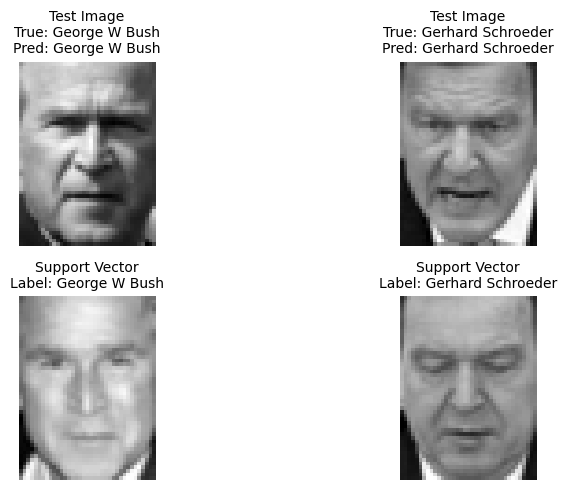

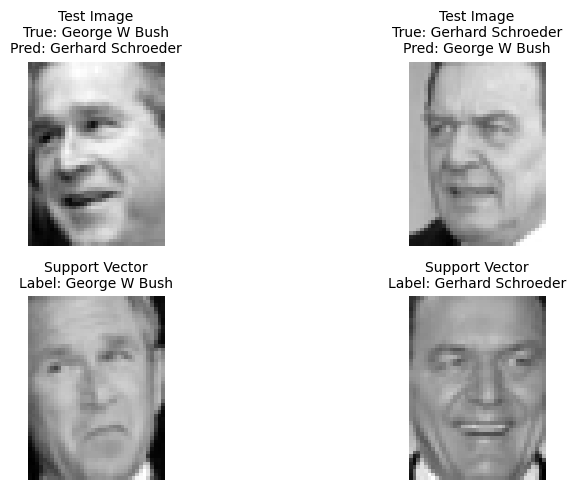

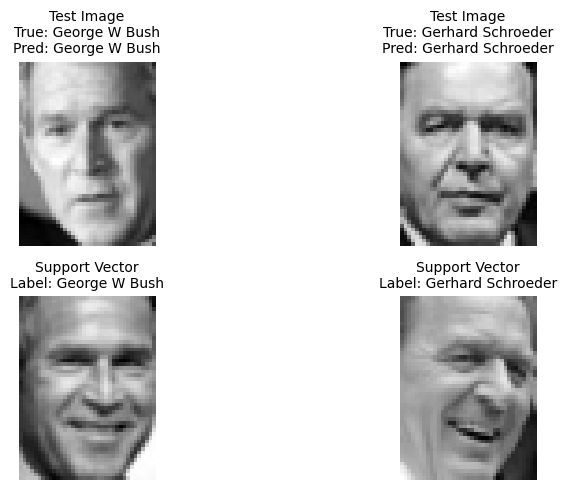

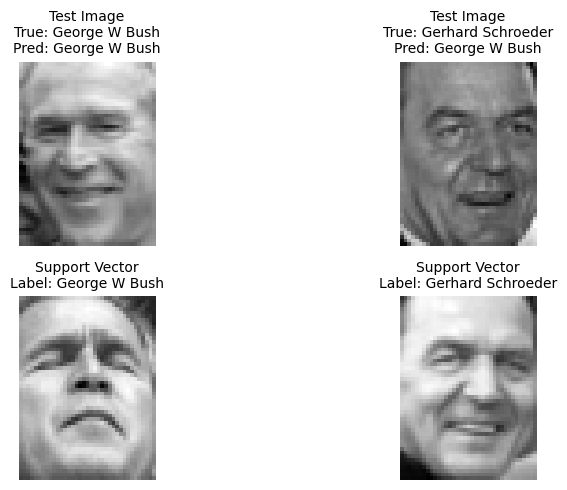

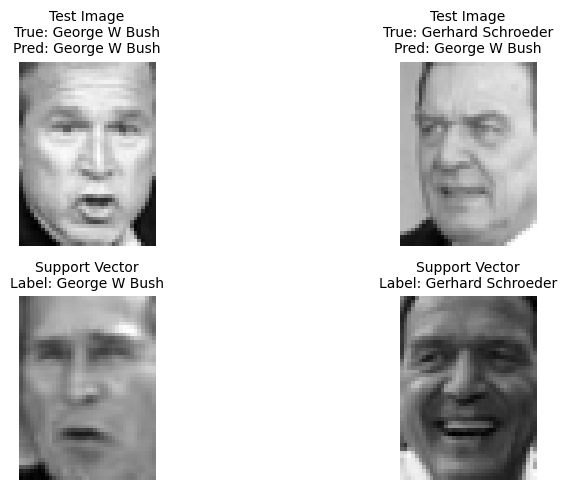

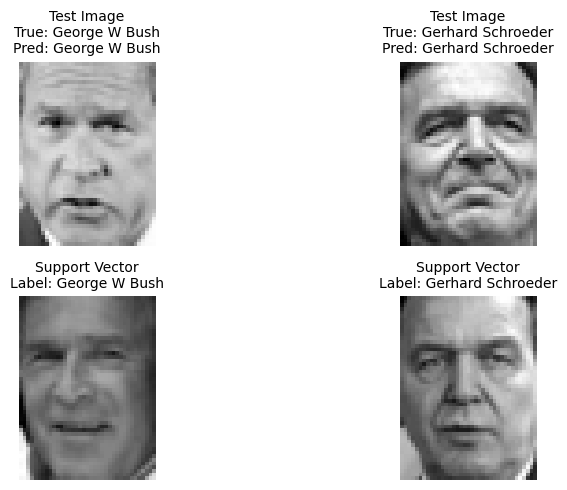

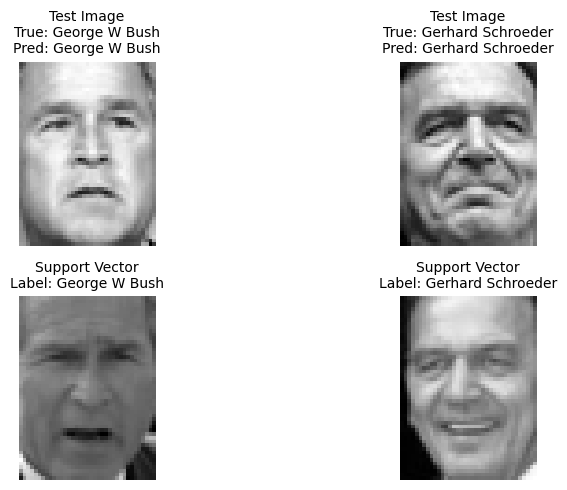

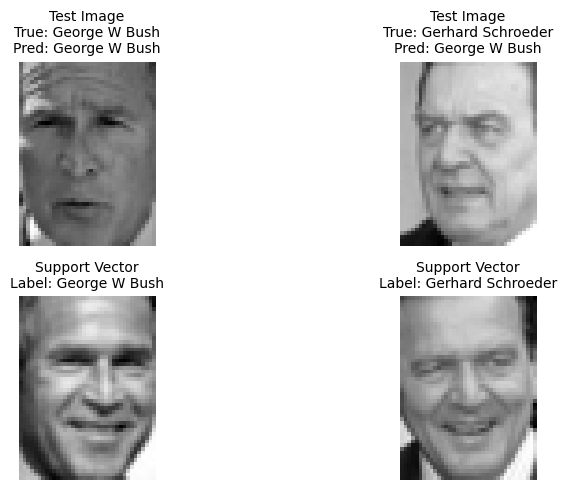

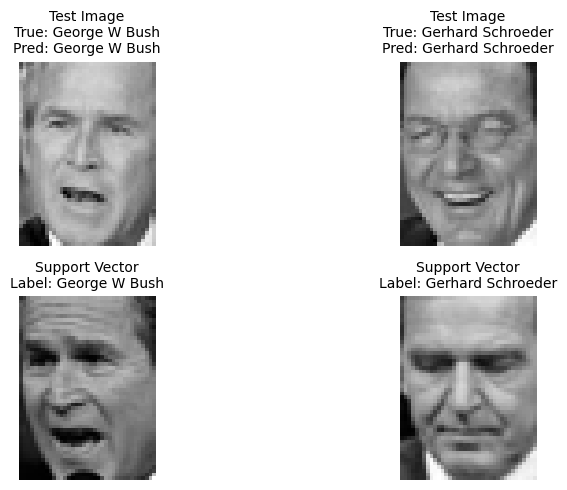

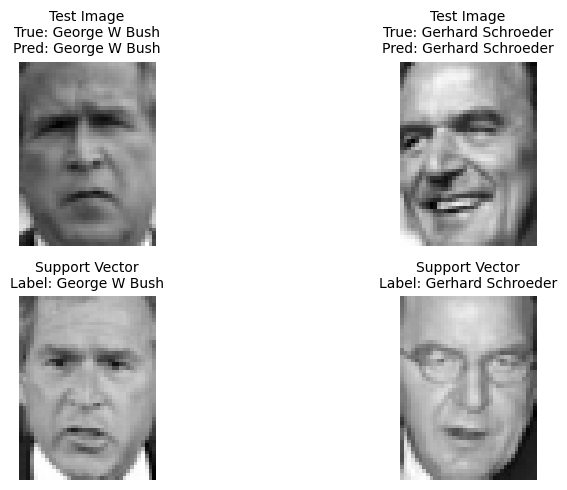

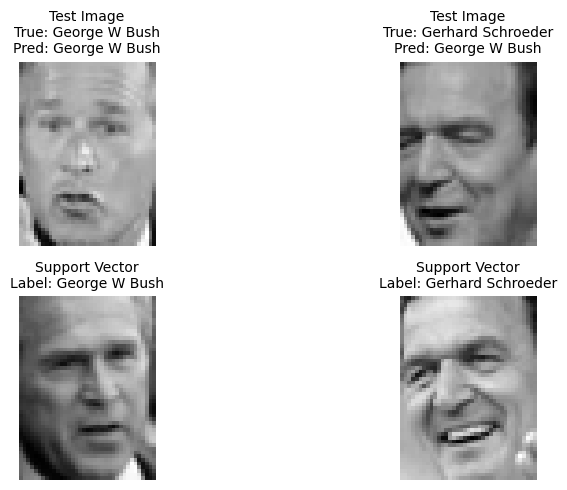

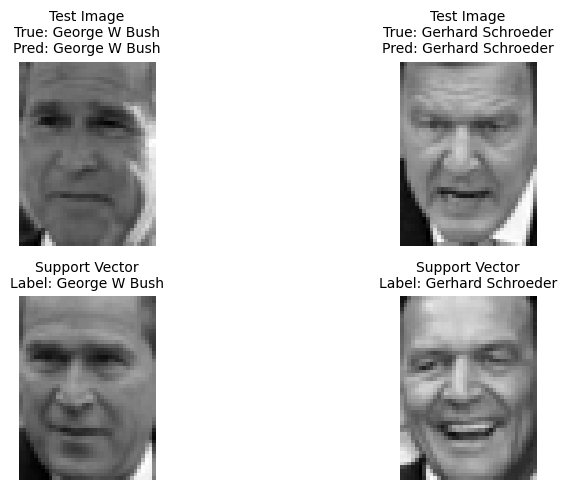

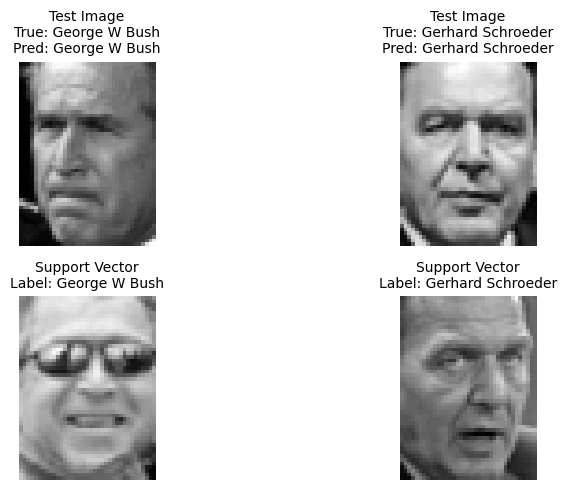

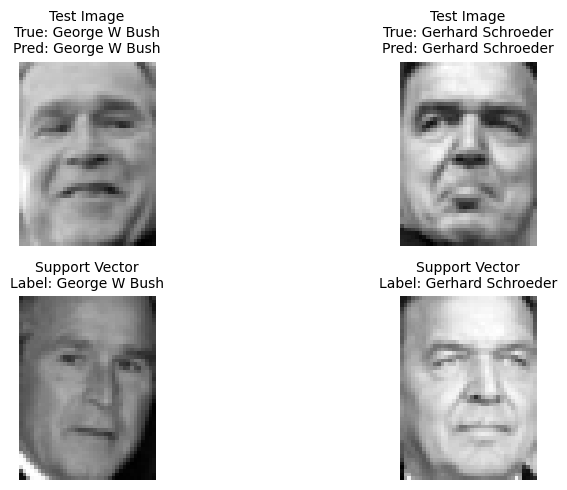

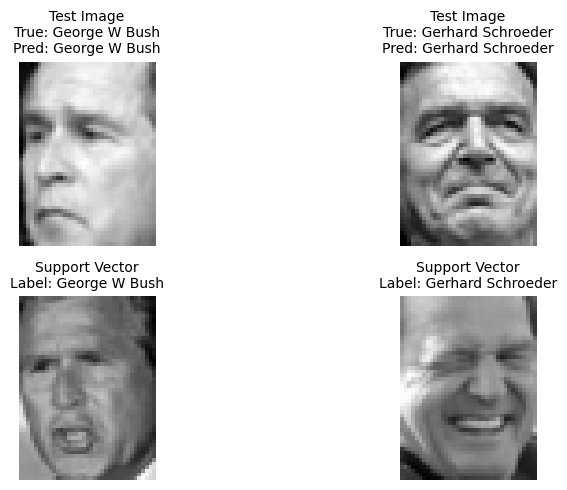

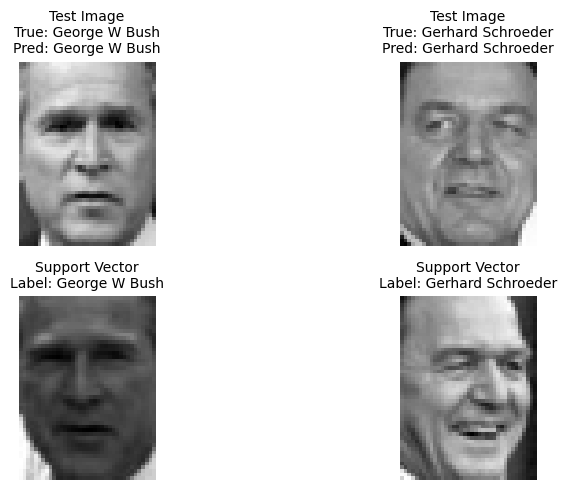

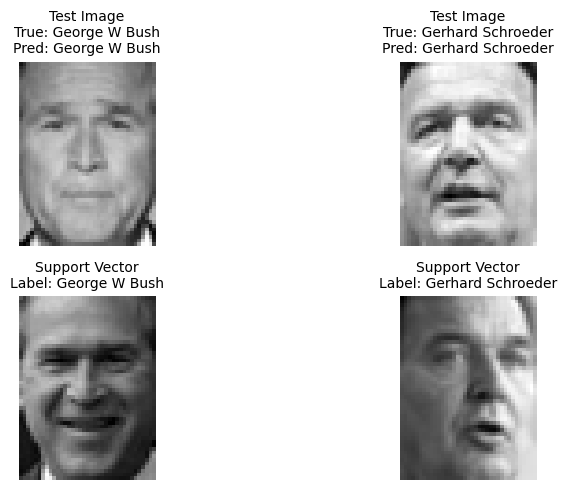

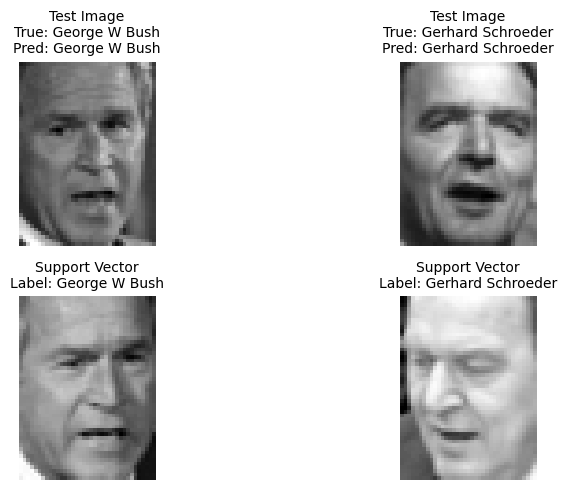

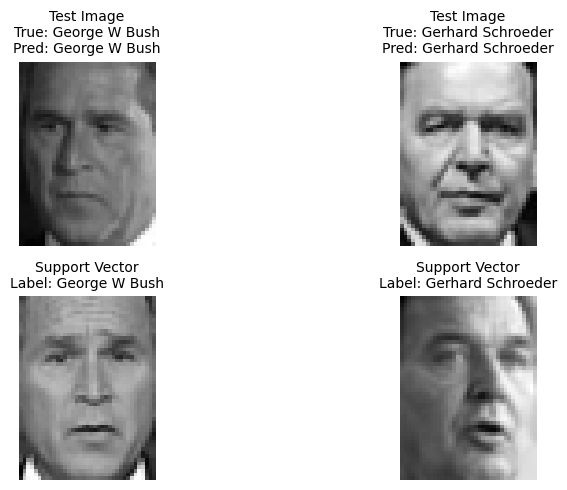

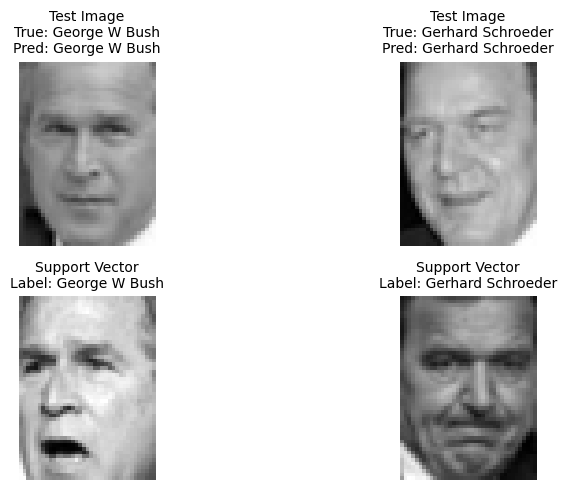

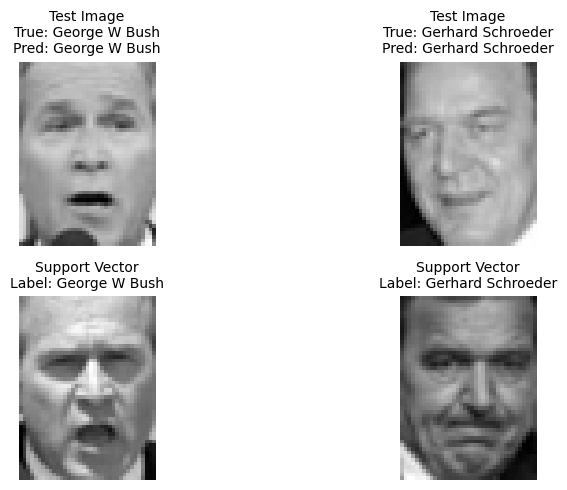

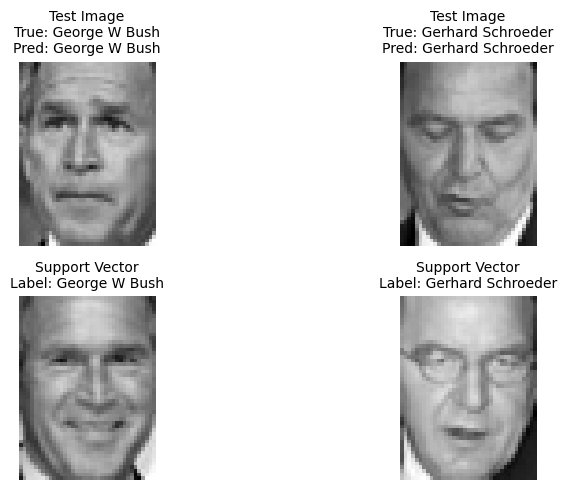

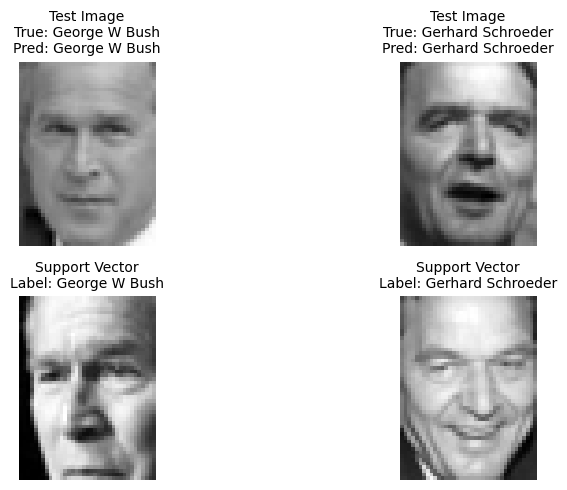

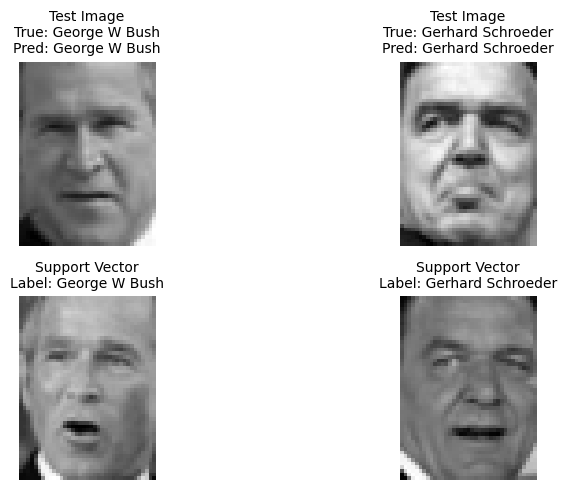

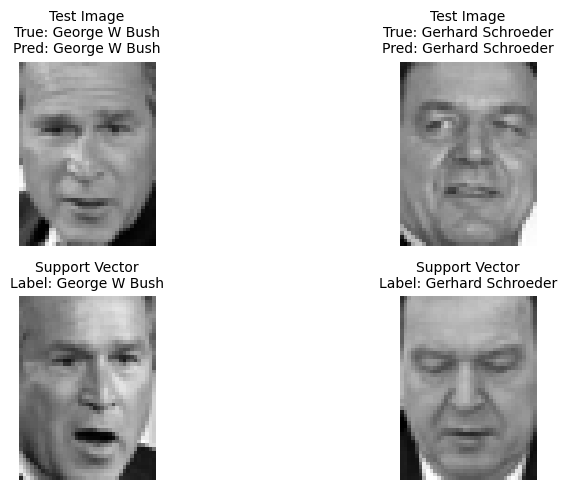

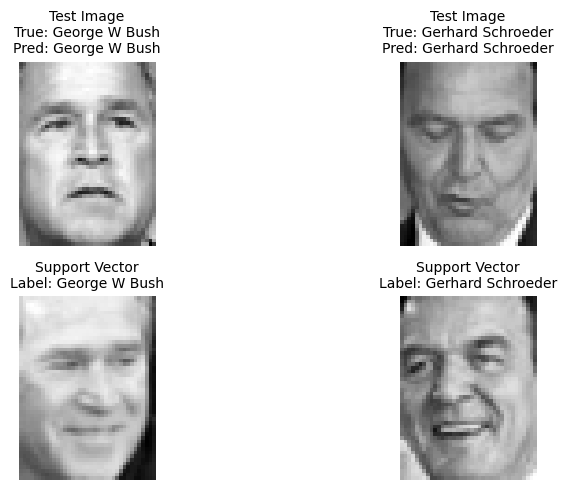

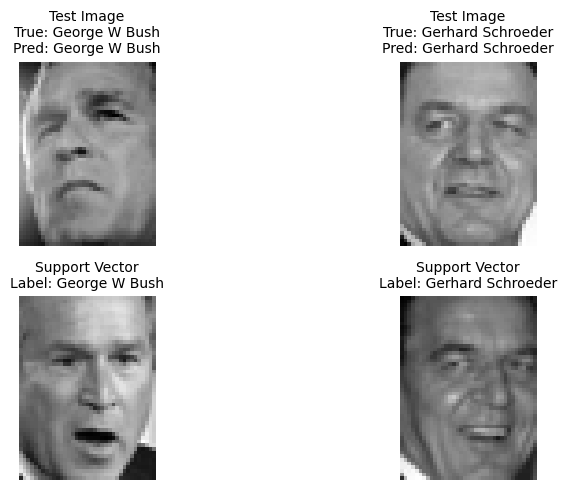

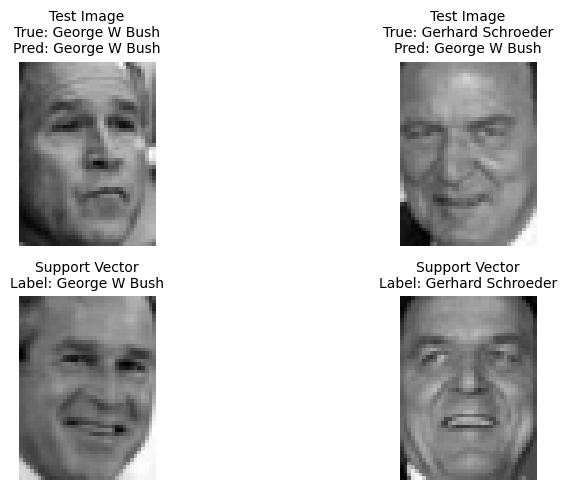

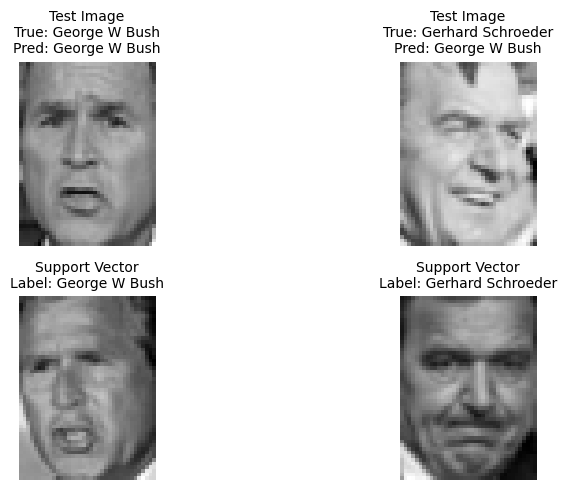

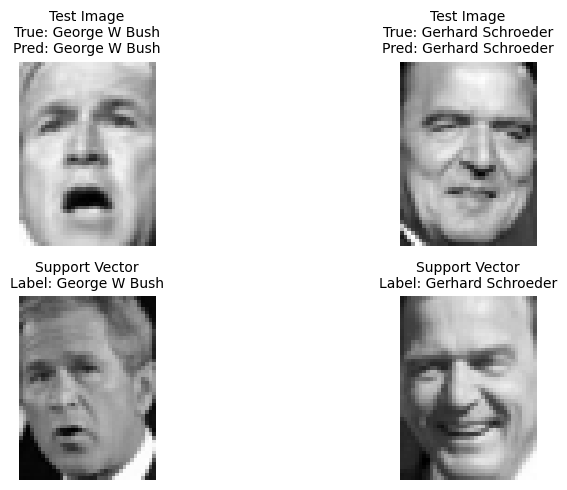

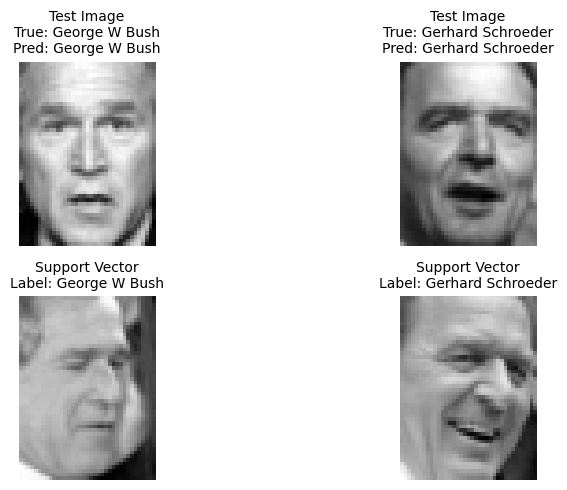

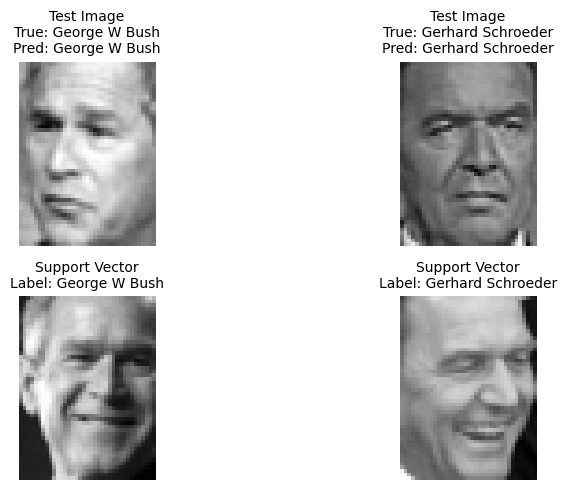

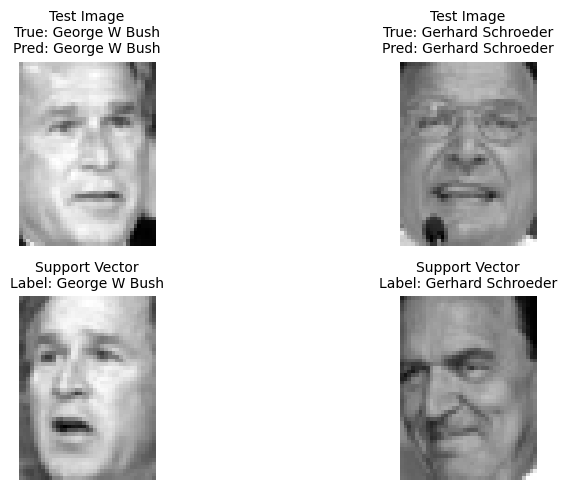

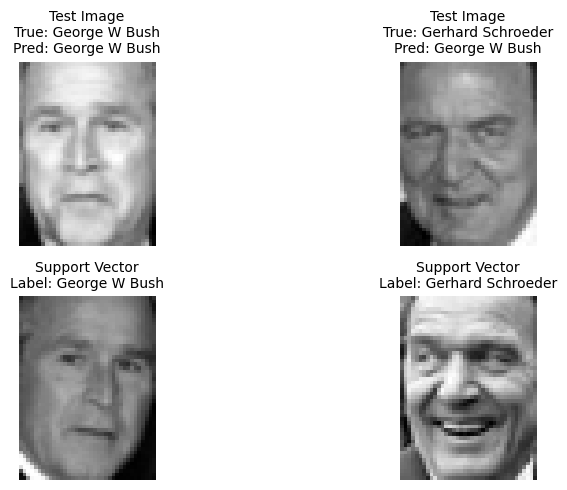

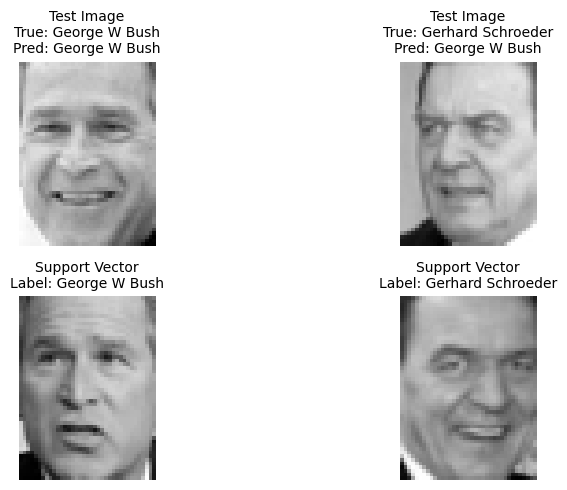

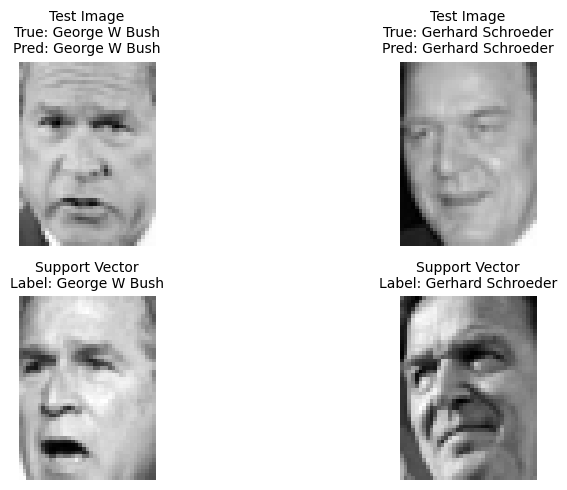

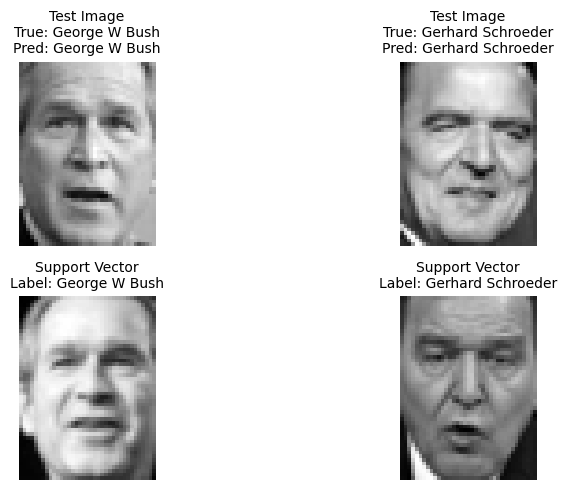

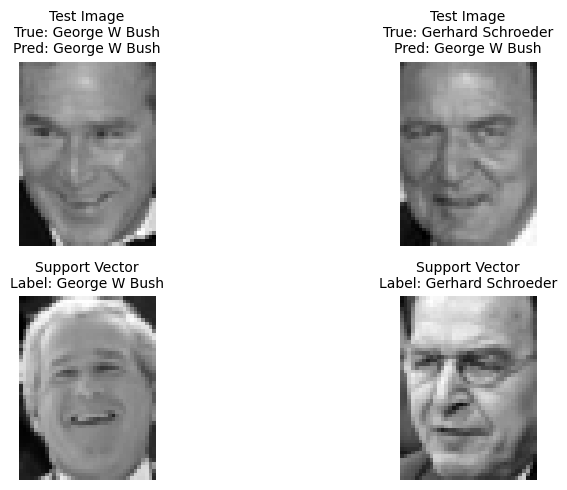

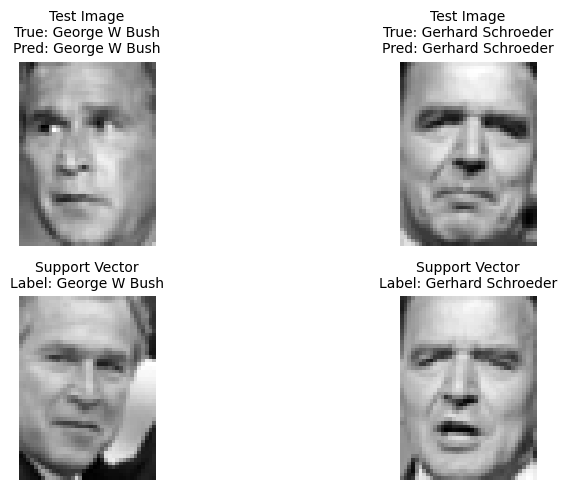

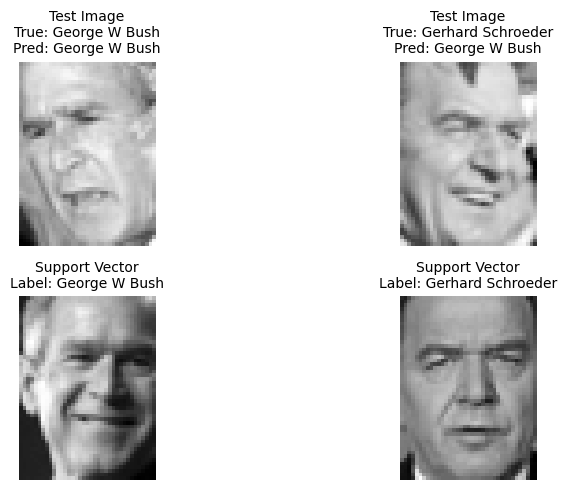

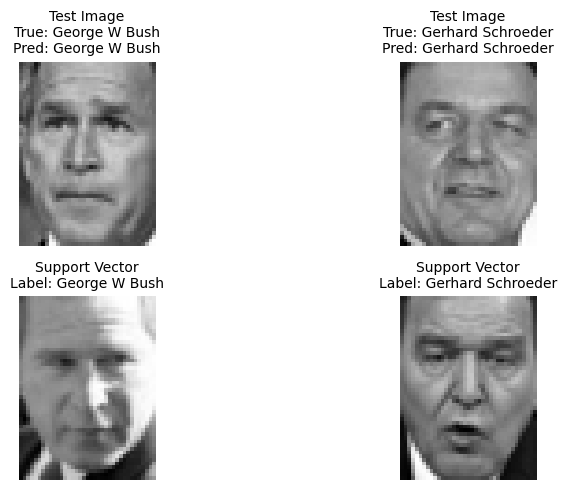

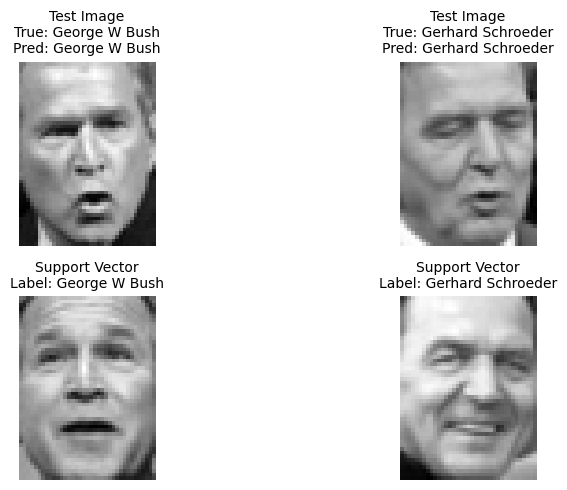

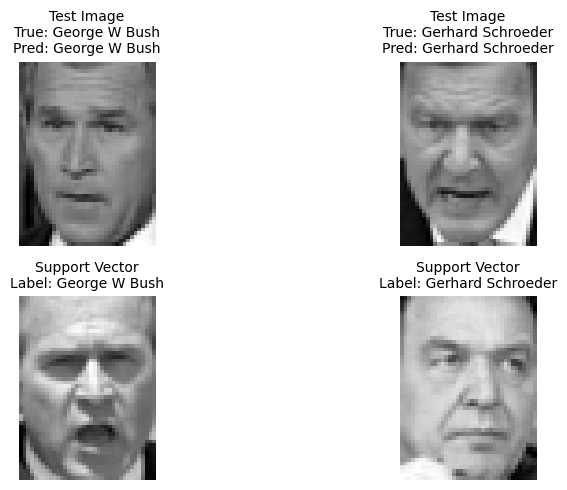

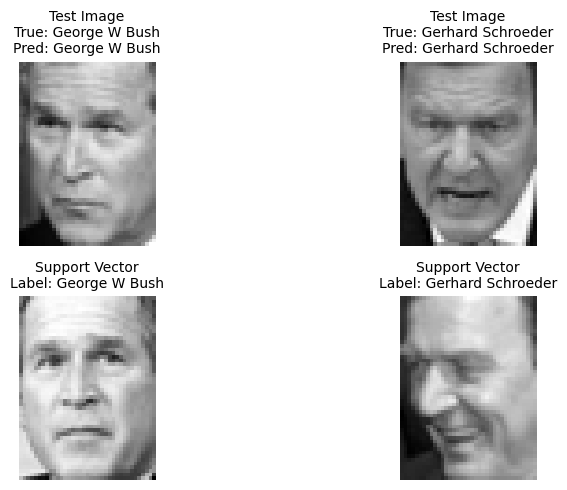

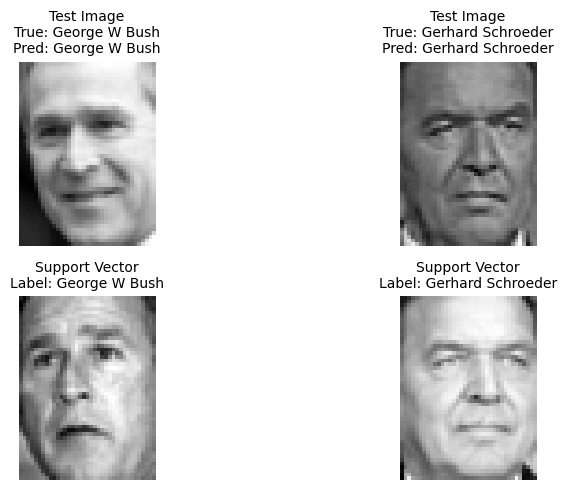

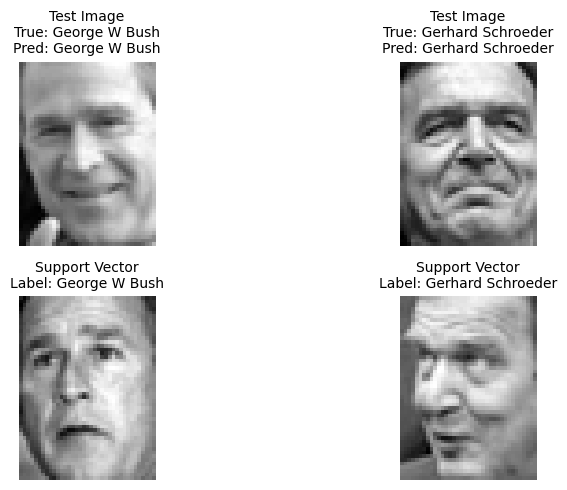

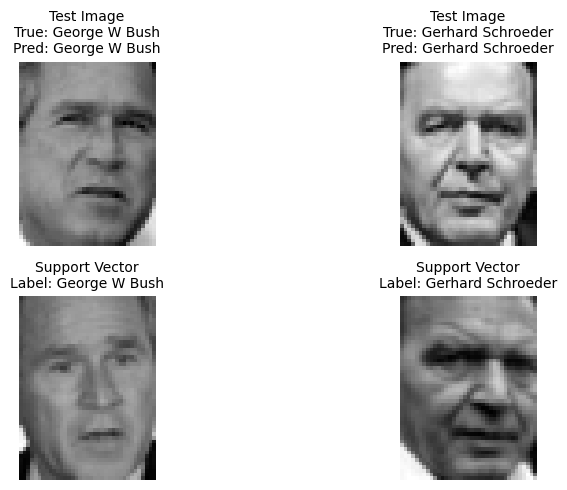

In [68]:
for _ in range(100):
    visualize_support_vectors(clf, X_test, y_true_test, H, W, seed=_)